# Import semua library yang diperlukan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load data

In [3]:
df = pd.read_excel('/content/regresitelkom.xlsx', header=None)
df

0         1         2         3         4         5         6   \
0   2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905   
1   2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   
2   2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940   
3   2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   
4   2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409   
..   ...       ...       ...       ...       ...       ...       ...   
95  2008  40.52844  94.84664  -4.30738  16.91223  -0.36071 -20.26923   
96  2007  42.50667  54.55728   3.55290   0.07497   3.02242 -18.68328   
97  2008  35.90924  38.48010 -35.28746  40.17962   3.15639  -1.33066   
98  2007  38.19679  76.96358 -53.86312  41.08638   6.01233 -12.39083   
99  2008  39.34269  22.42173  -5.80454  35.40435  -2.77850 -17.94040   

          7         8         9   ...        81         82          83  \
0  -25.01202 -12.23257   7.83089  ...  13.01620  -54.40548    58.99367   
1    8.76630  -0.92019  18.76548  ...   5.66812  -19.68073    33.04964   
2   -3.27872  -2.35035  16.07017  ...   3.03800   26.05866   -50.92779   
3    5.05097 -10.34124   3.55005  ...  34.57337 -171.70734   -16.96705   
4  -12.48207  -9.37636  12.63699  ...   9.92661  -55.95724    64.92712   
..       ...       ...       ...  ...       ...        ...         ...   
95   5.05784  21.94073   7.35253  ...   5.13726 -186.91884   137.02176   
96   7.34348 -10.31993  16.12474  ...  -1.03493  145.72705   405.82837   
97   6.60072  -3.07919  -3.53034  ...  65.34368 -634.74383   133.45191   
98   6.35681   6.17352   0.21752  ...  11.51091 -228.52325  1006.74018   
99  15.84940  11.79529  13.21605  ...   2.64944 -487.66937   861.92125   

           84        85         86         87        88         89        90  
0    15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
1    42.87836  -9.90378  -32.22788   70.49388  12.04941   58.43453  26.92061  
2    10.93792  -0.07568   43.20130 -115.00698  -0.05859   39.67068  -0.66345  
3   -46.67617 -12.51516   82.58061  -72.08993   9.90558  199.62971  18.85382  
4   -17.72522  -1.49237   -7.50035   51.76631   7.88713   55.66926  28.74903  
..        ...       ...        ...        ...       ...        ...       ...  
95   51.99319  10.37311   26.33303   -2.33600  21.37996 -255.92642  -6.77658  
96   63.10282   5.22287  143.51604  -46.17365   1.56539  139.68990   8.57657  
97   42.63473 -53.58353 -211.51100  345.41501 -28.71924  120.17610  47.40389  
98   80.29338 -14.25768  177.04803    9.32533  61.01379   72.57867  12.12484  
99  272.24123  -5.35319 -536.13978  -94.70218  31.70197  231.02157  10.04087  

[100 rows x 91 columns]

# Menggunakan unique() untuk mengtahui isi label y

In [3]:
df[0].unique()

array([2001, 2007, 2008, 2002, 2004, 2003, 1999, 1992, 1997, 1987, 2000,
       2005, 1996, 1998, 2009])

Isi label 'y': [2001, 2007, 2008, 2002, 2004, 2003, 1999, 1992, 1997, 1987, 2000, 2005, 1996, 1998, 2009]

# Membaca keseluruhan untuk mengetahui null

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    int64  
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
 15  15      100 non-null    float64
 16  16      100 non-null    float64
 17  17      100 non-null    float64
 18  18      100 non-null    float64
 19  19      100 non-null    float64
 20  20      100 non-null    float64
 21  21      100 non-null    float64
 22  22 

Dari hasil info() diatas, keseluruhan Feature tidak memiliki data yang null atau kosong

# Melakukan Exploratory Data Analysis

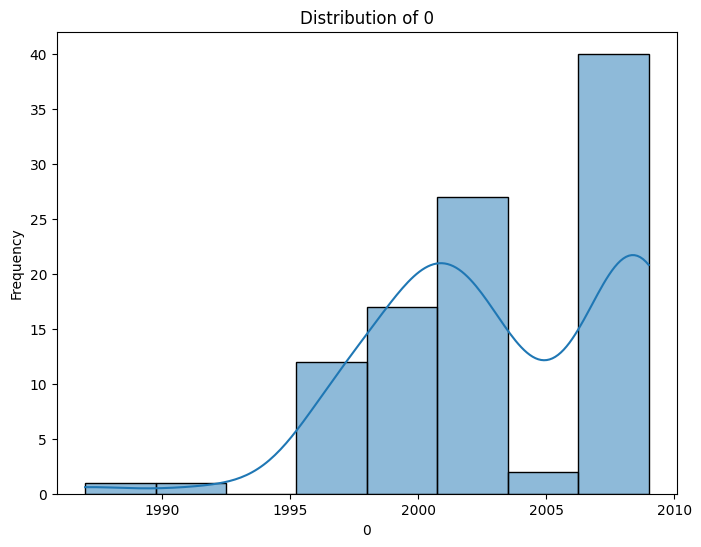

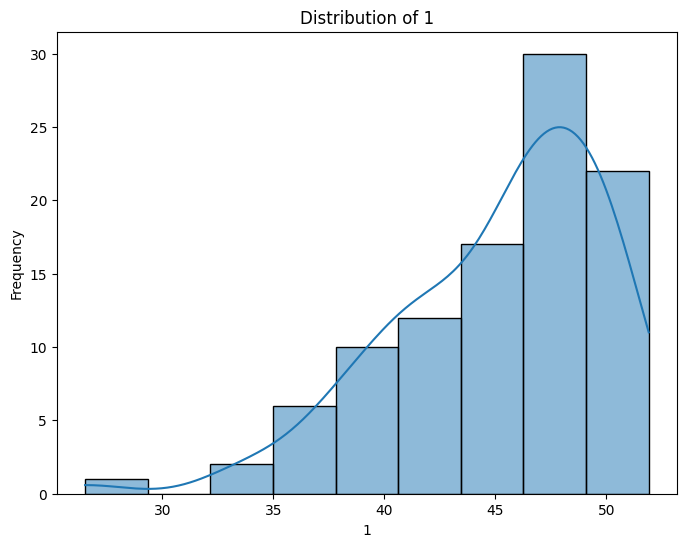

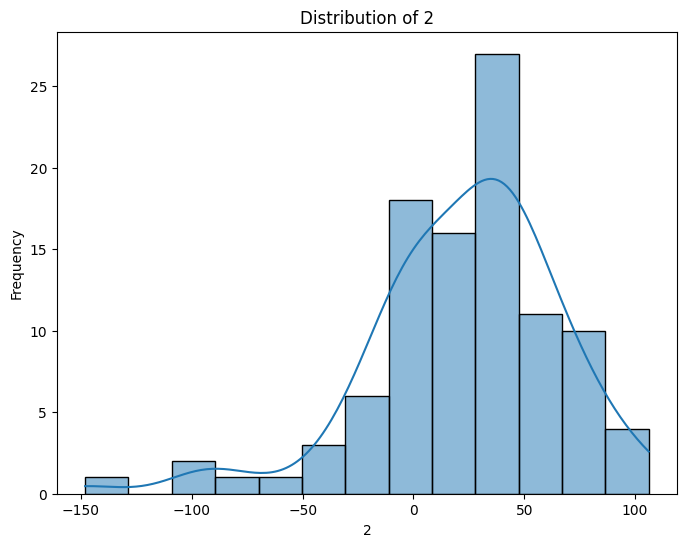

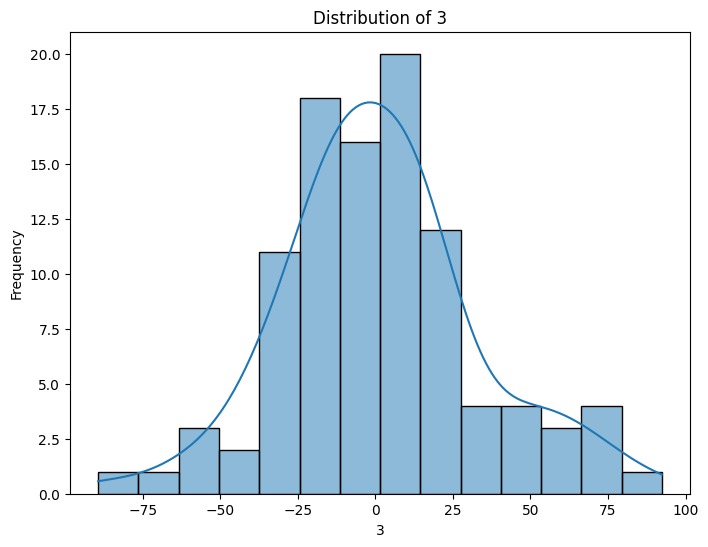

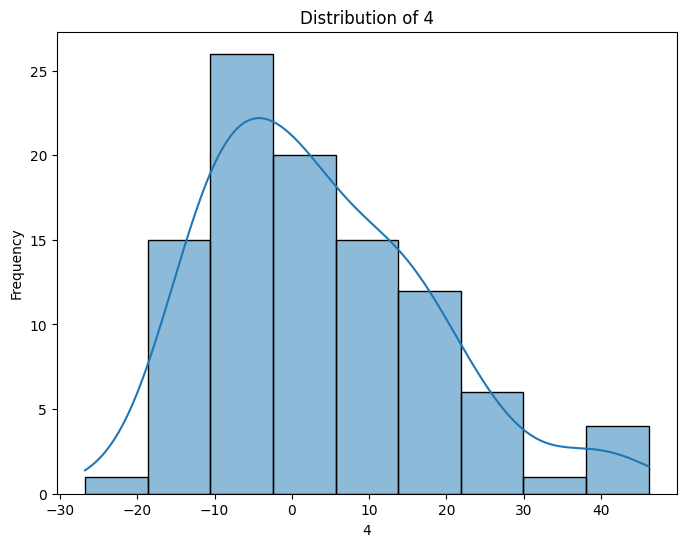

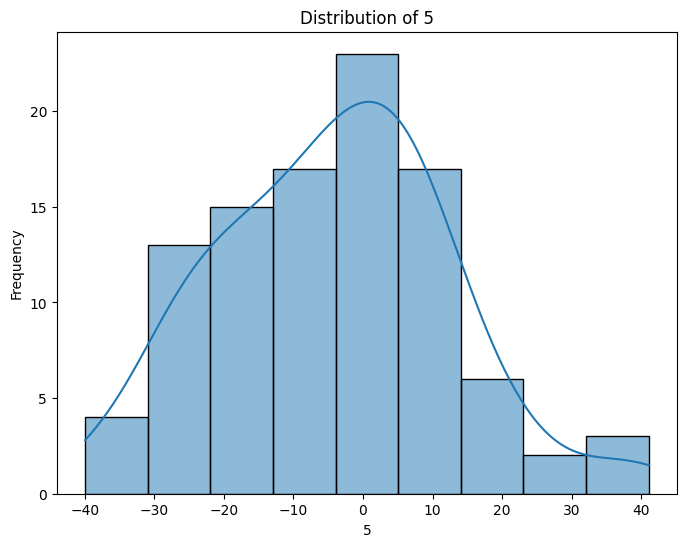

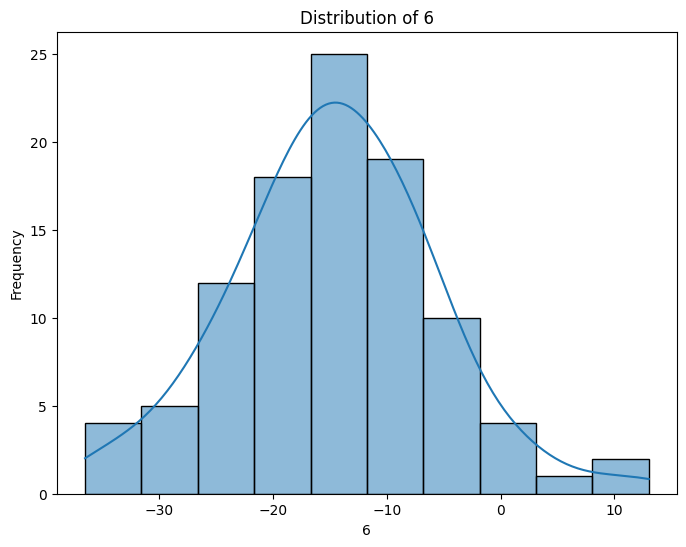

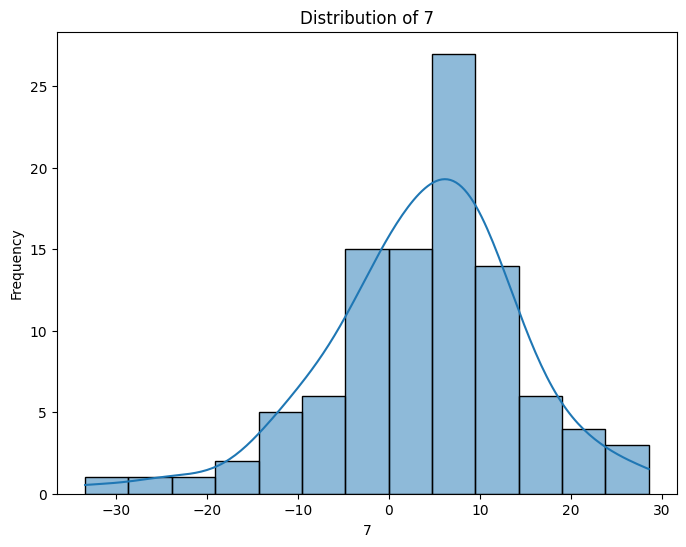

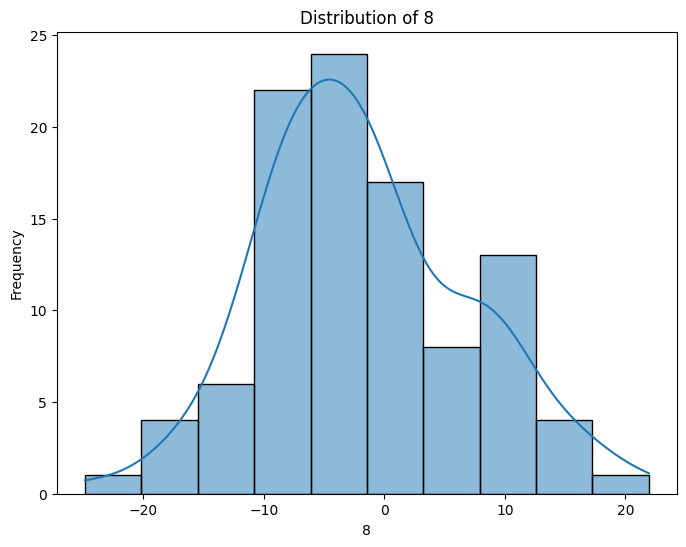

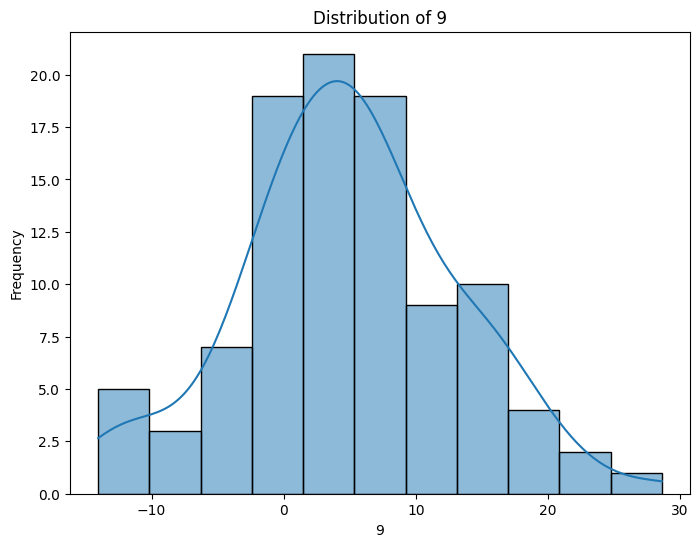

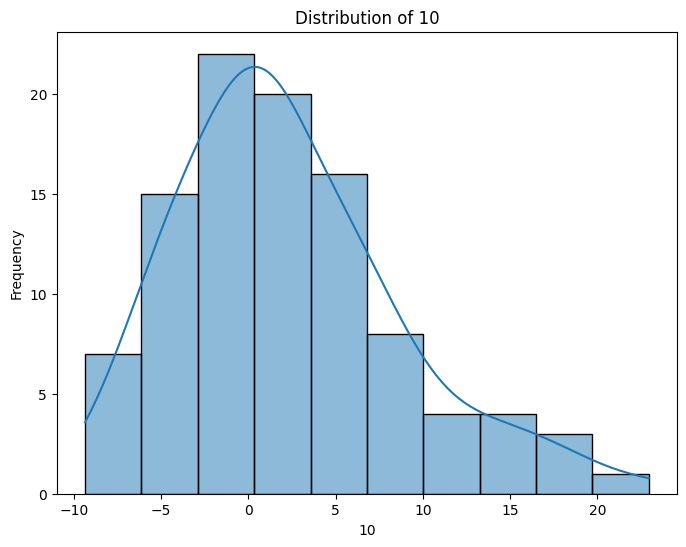

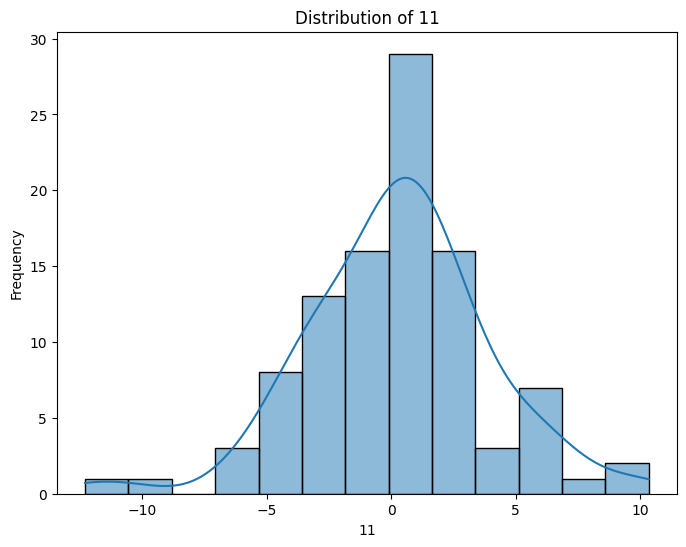

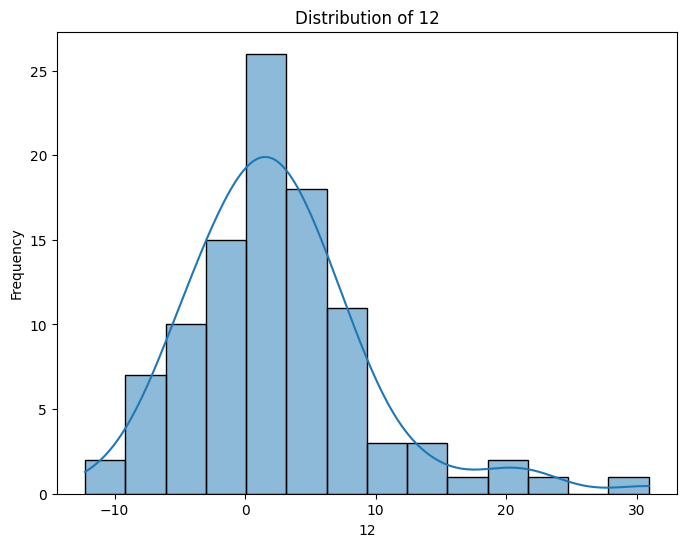

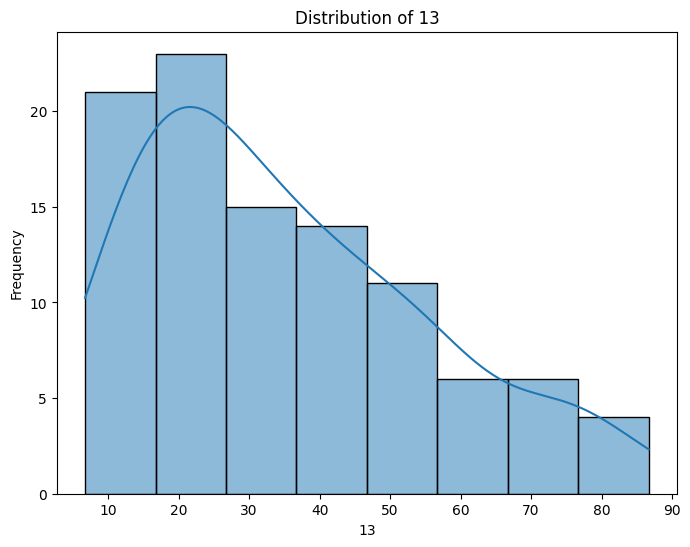

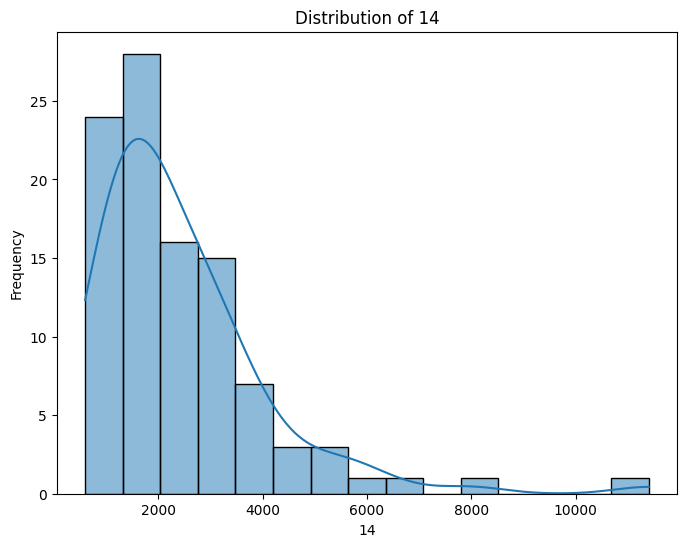

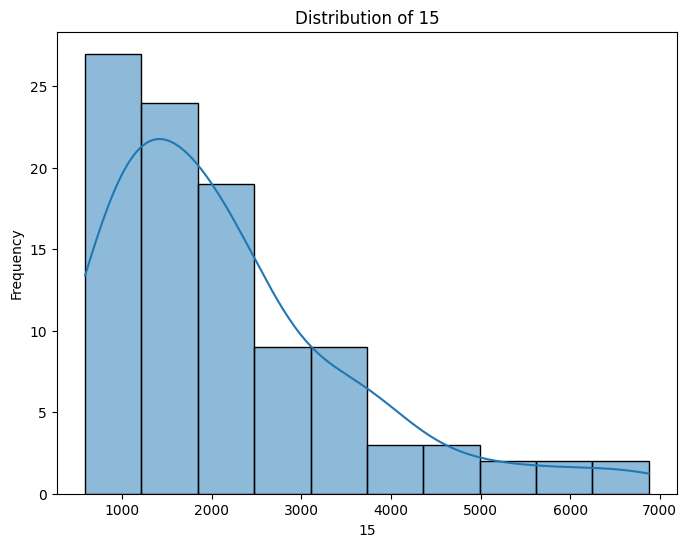

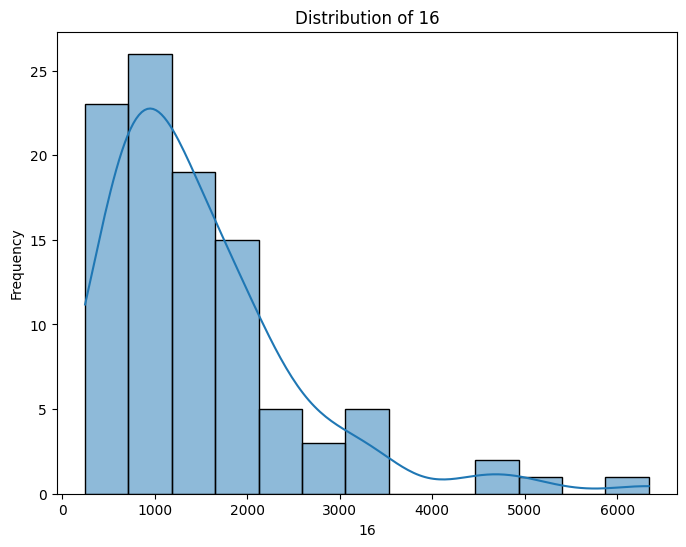

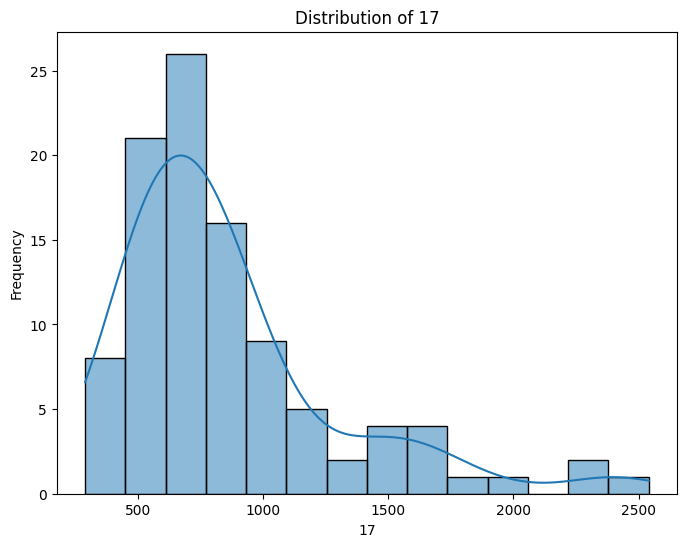

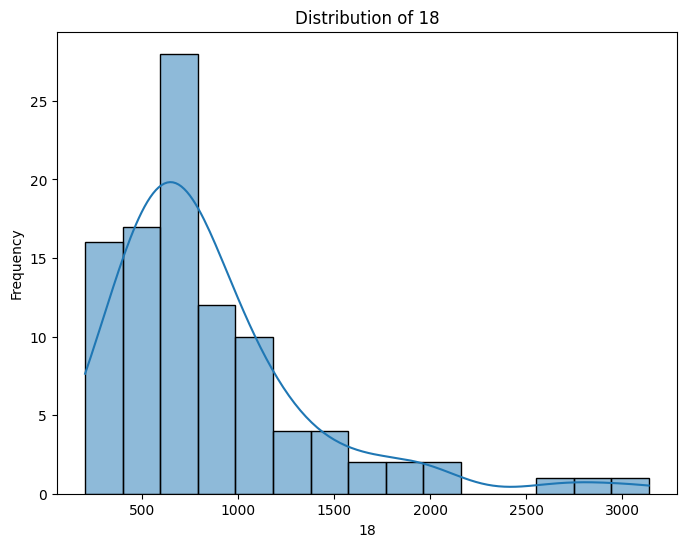

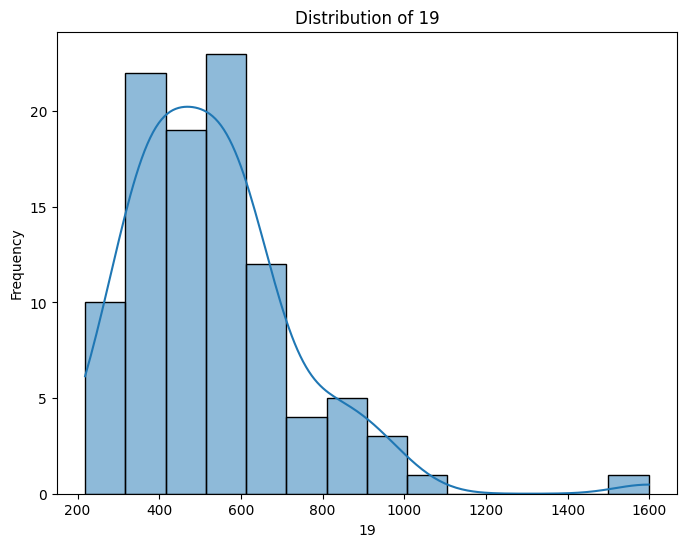

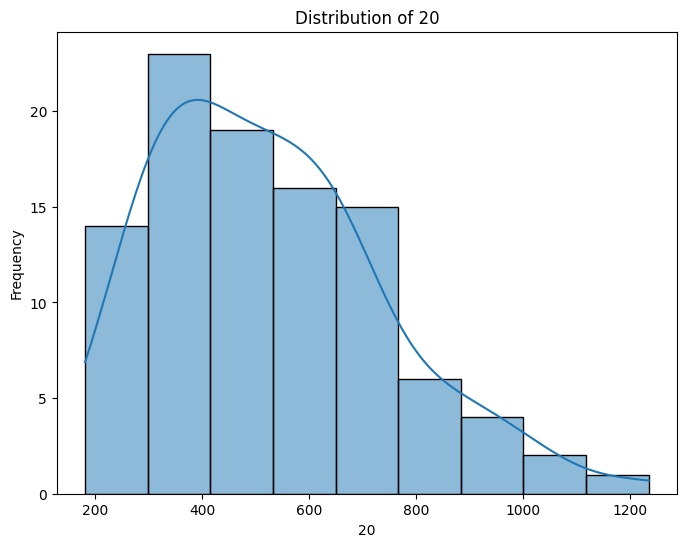

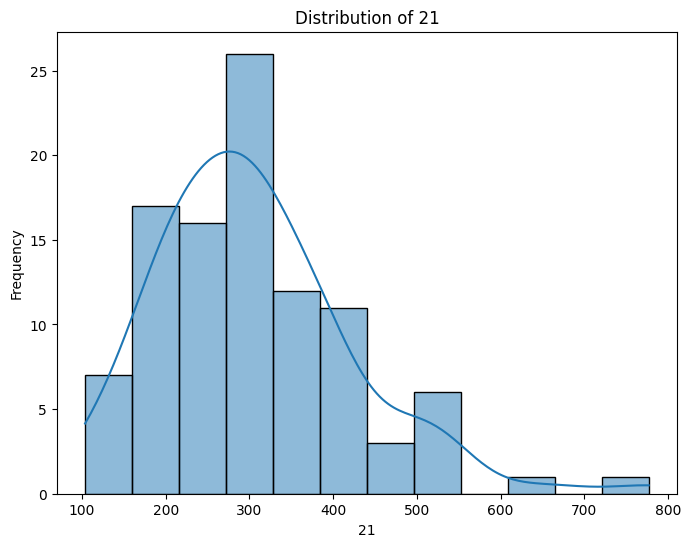

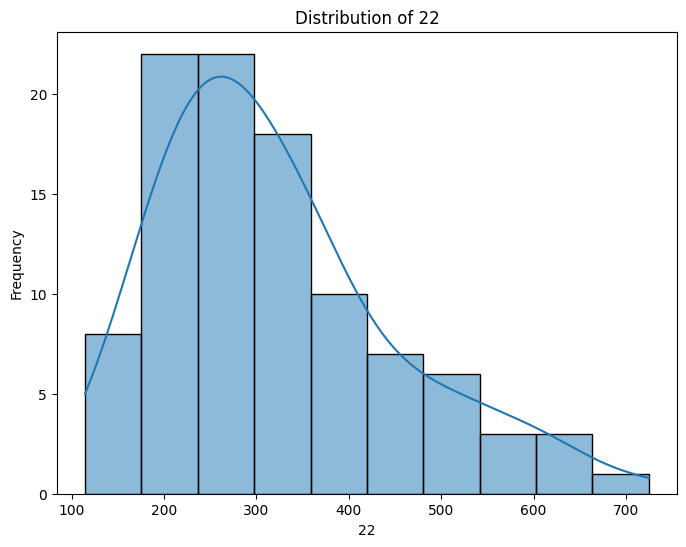

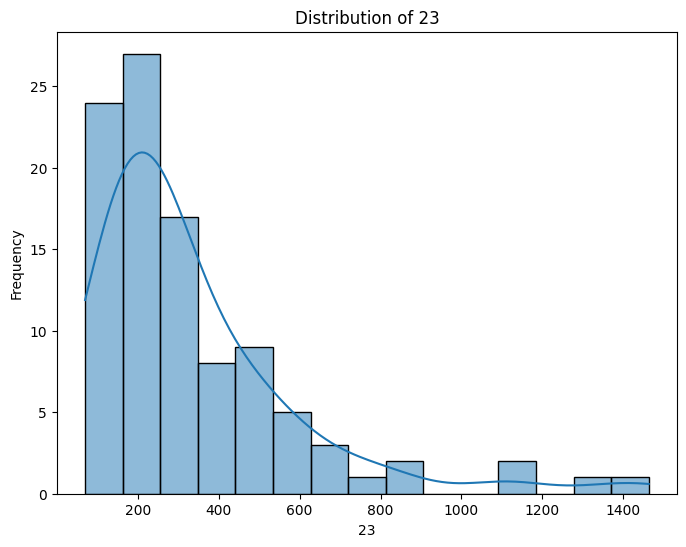

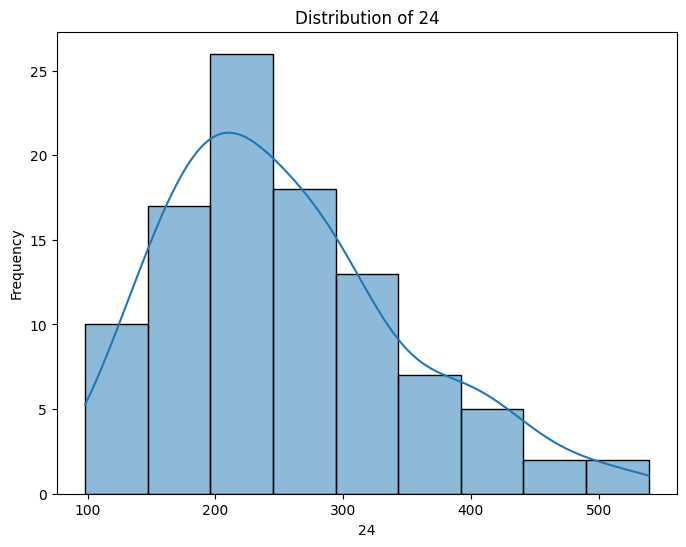

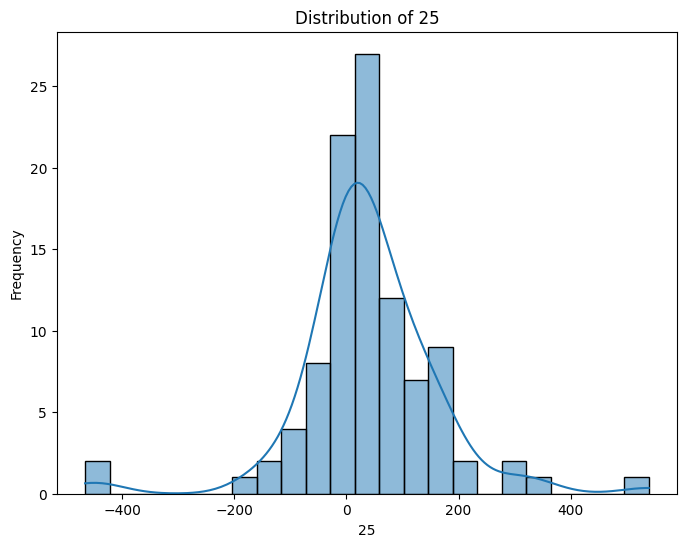

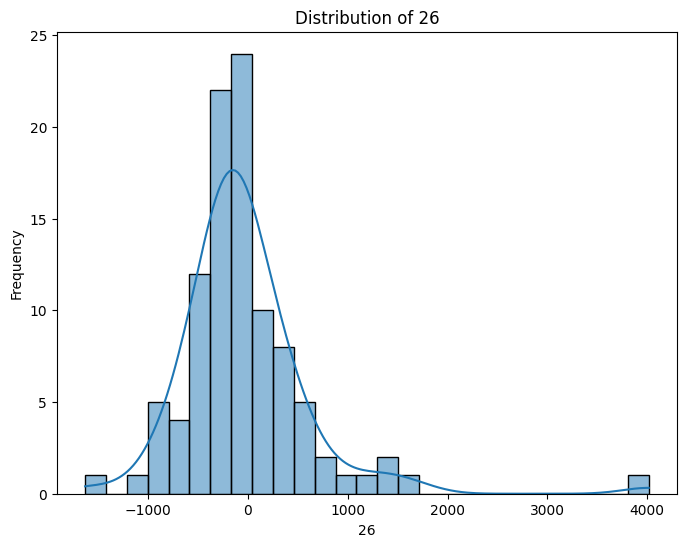

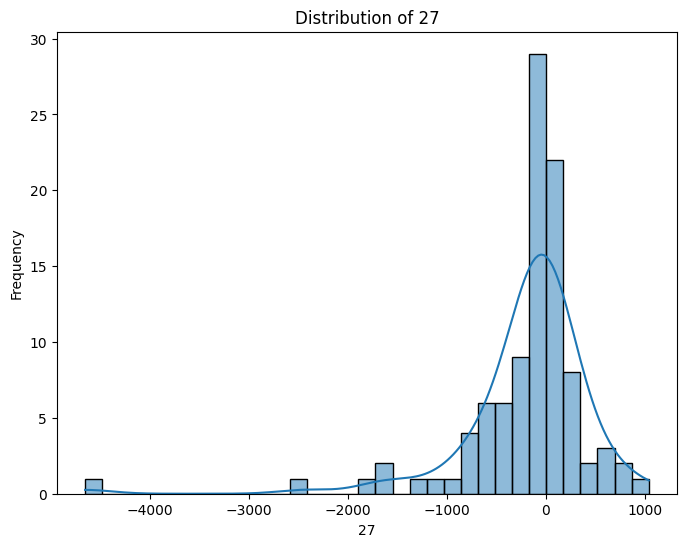

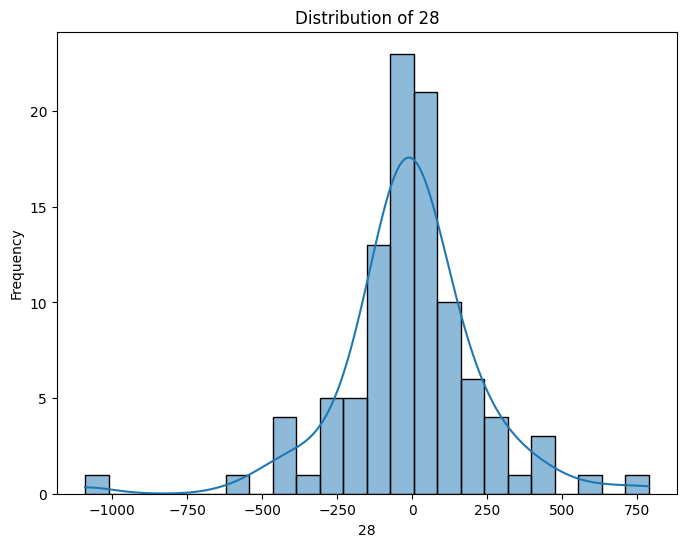

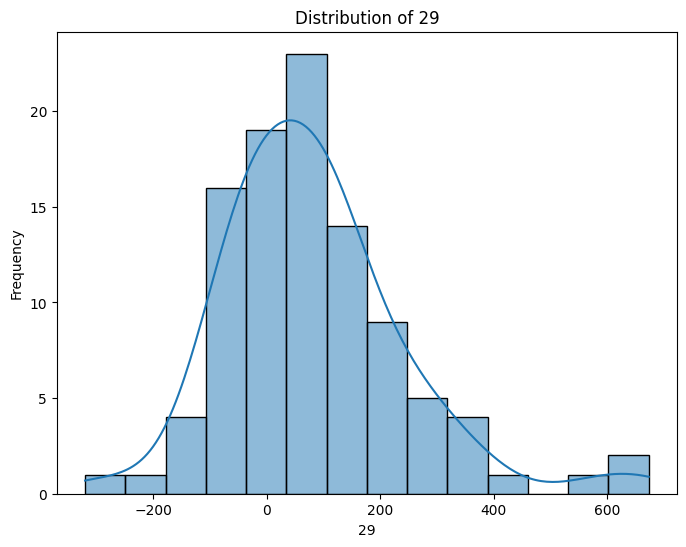

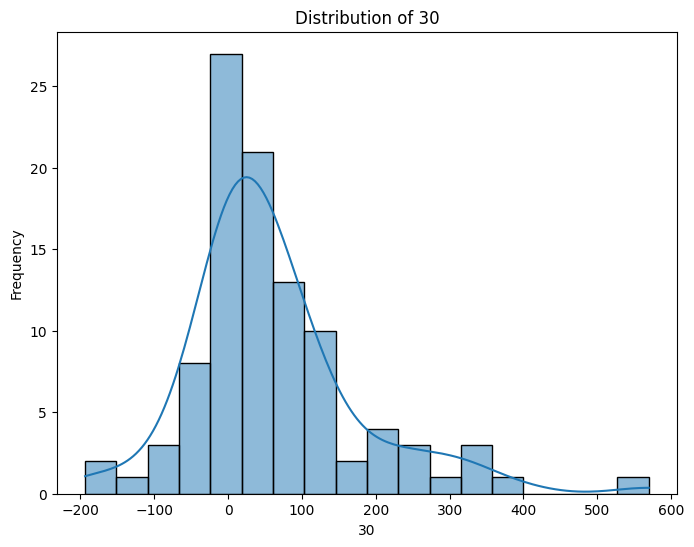

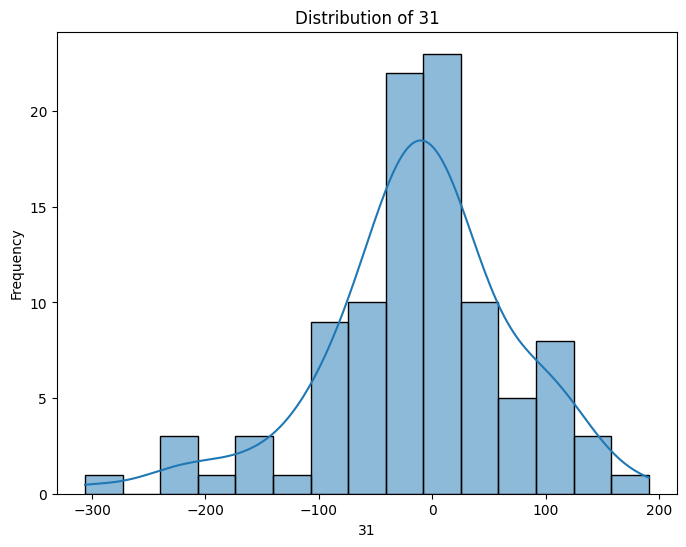

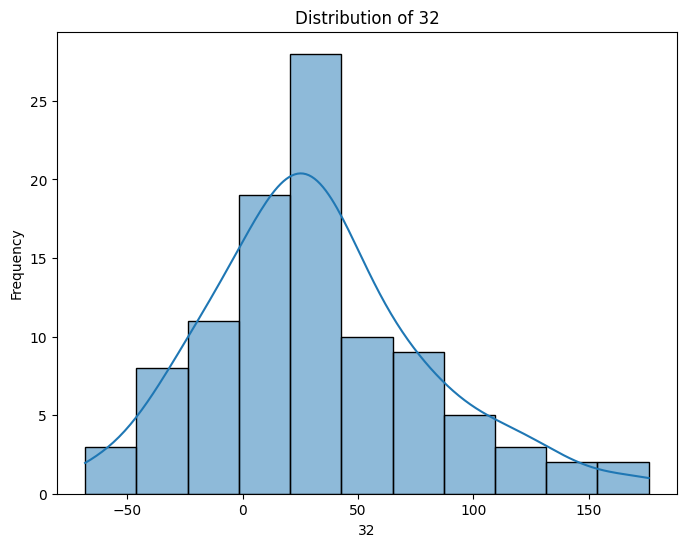

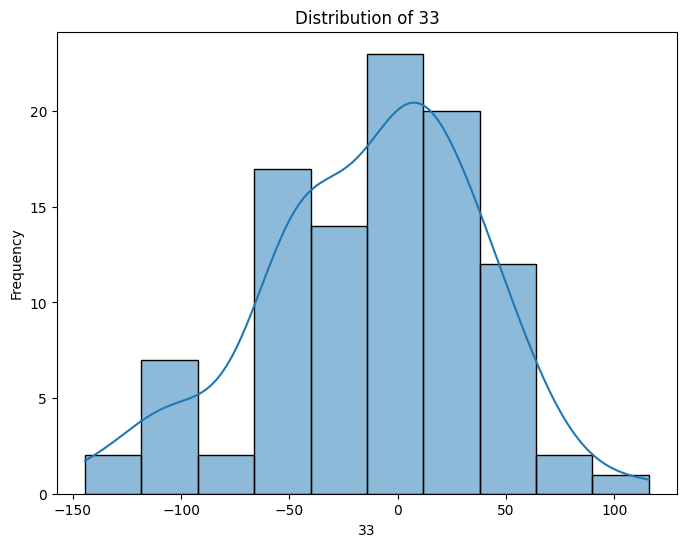

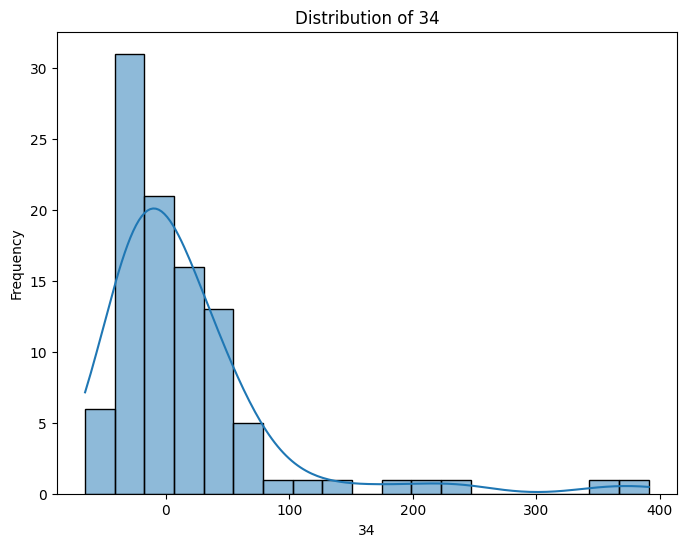

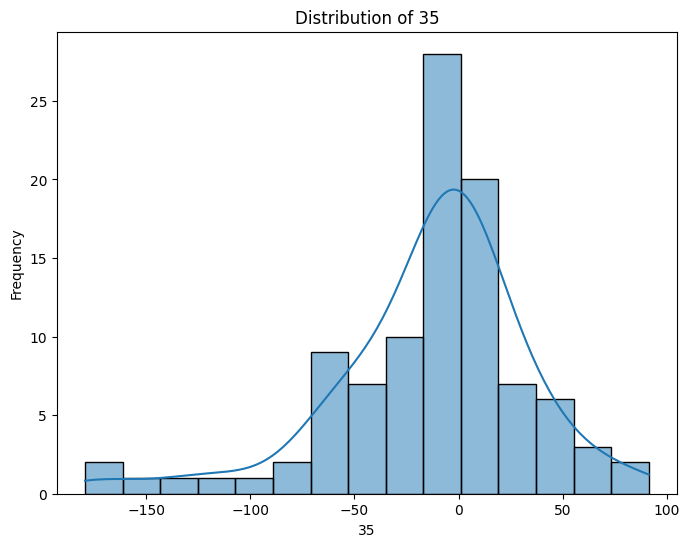

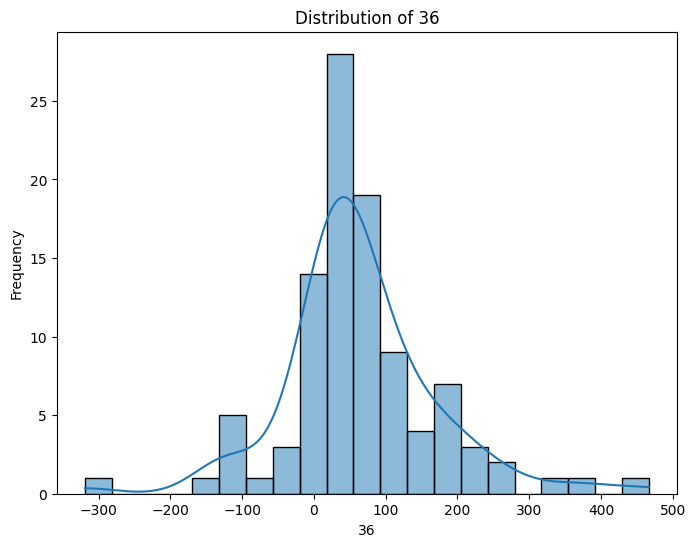

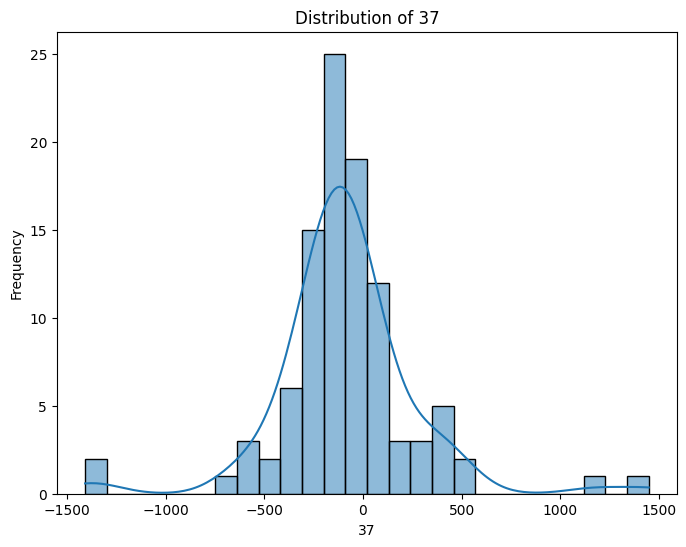

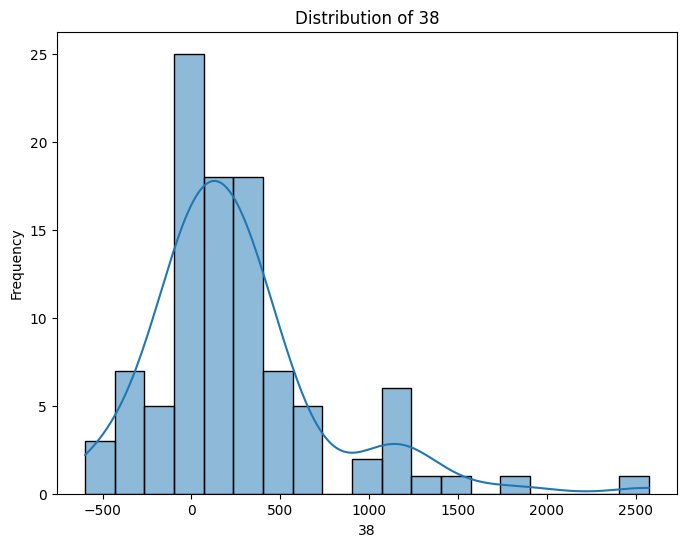

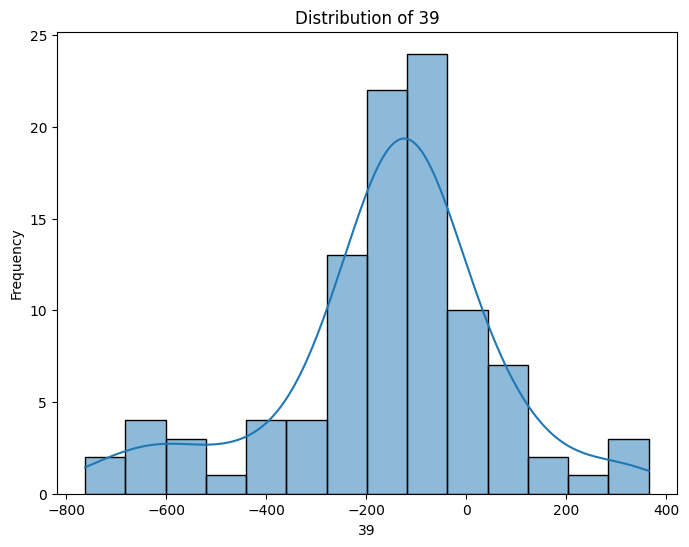

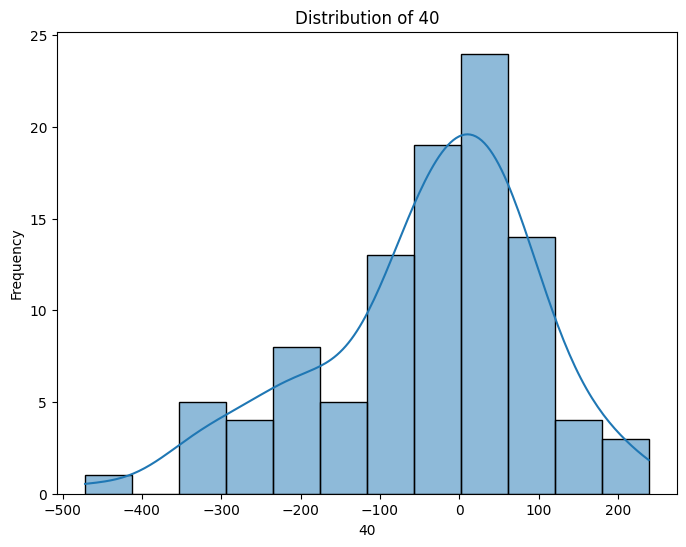

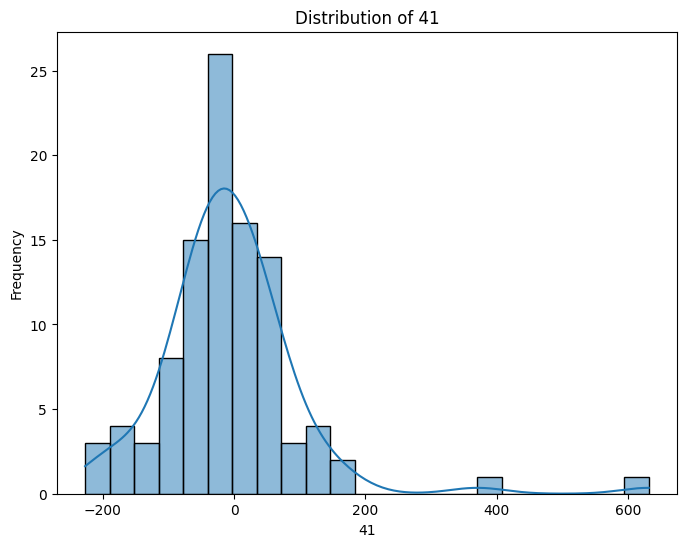

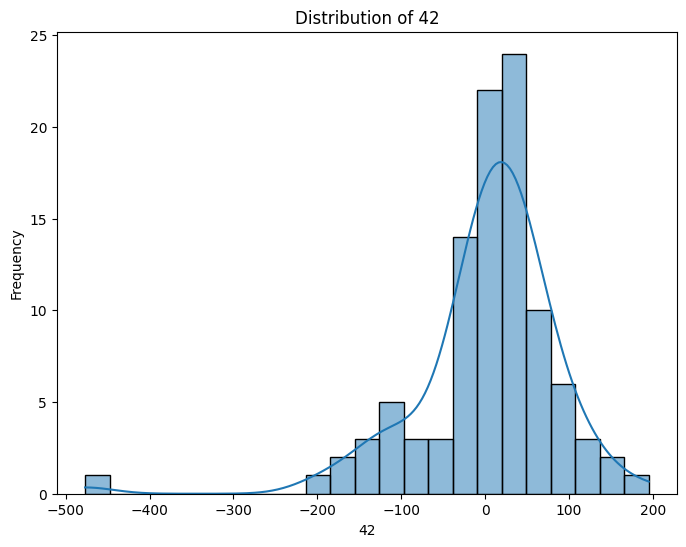

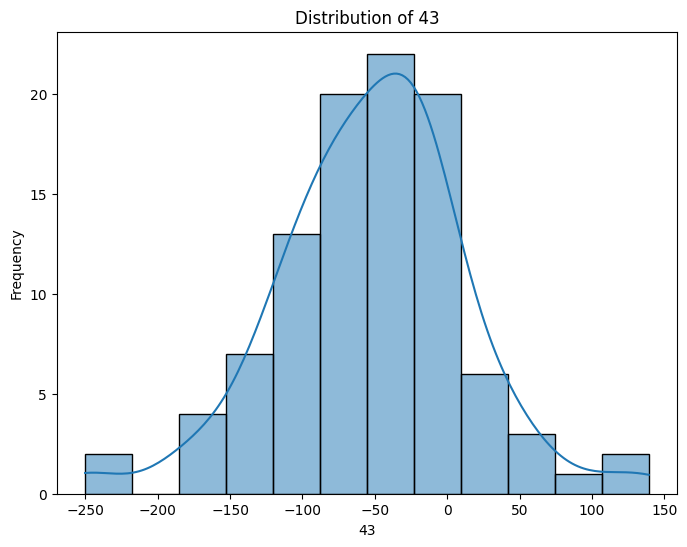

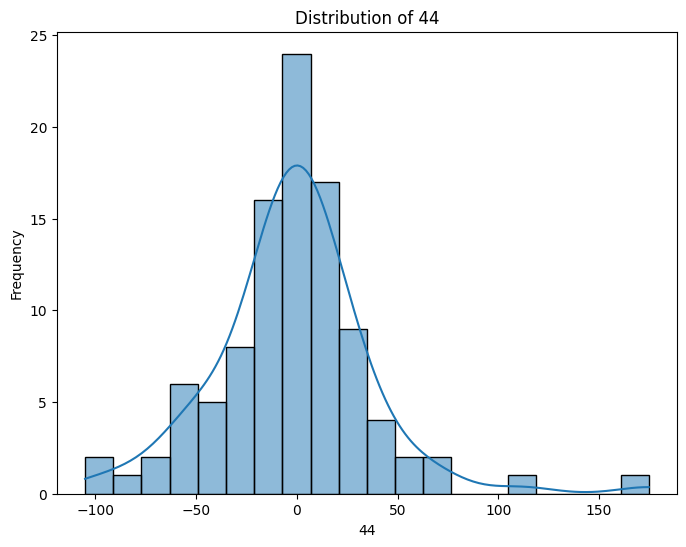

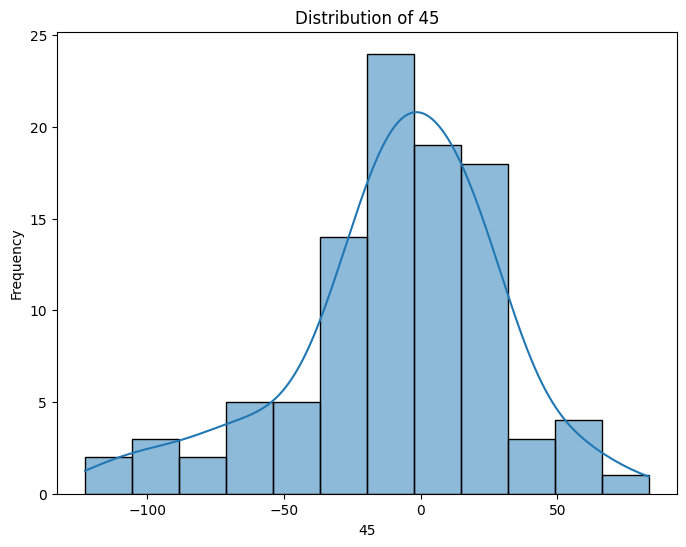

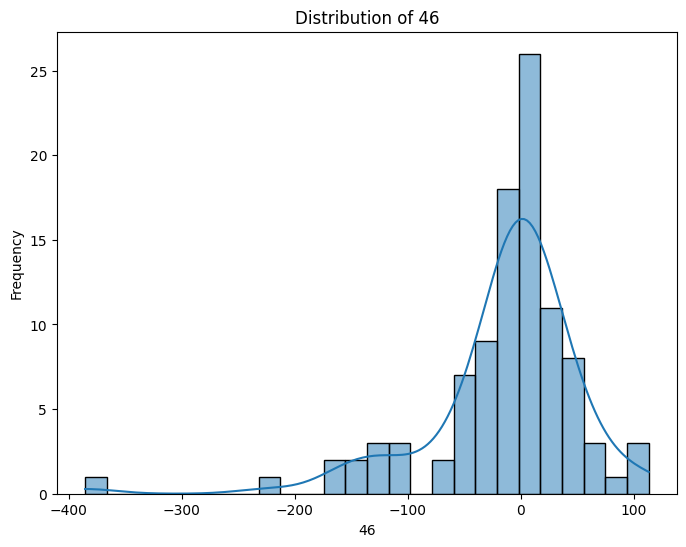

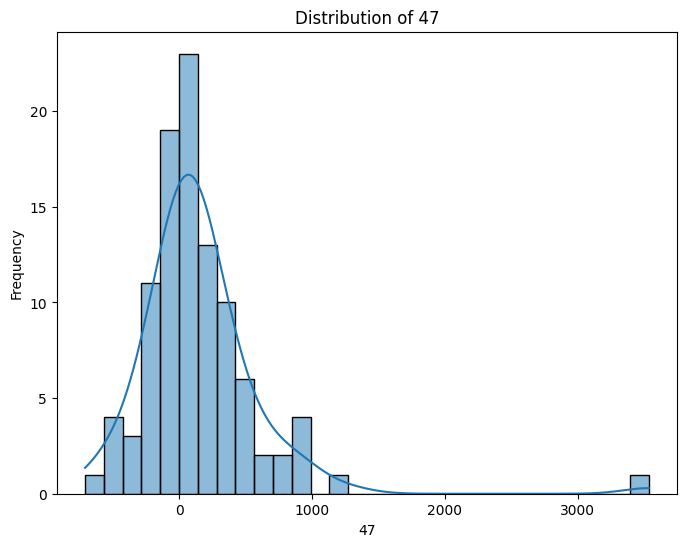

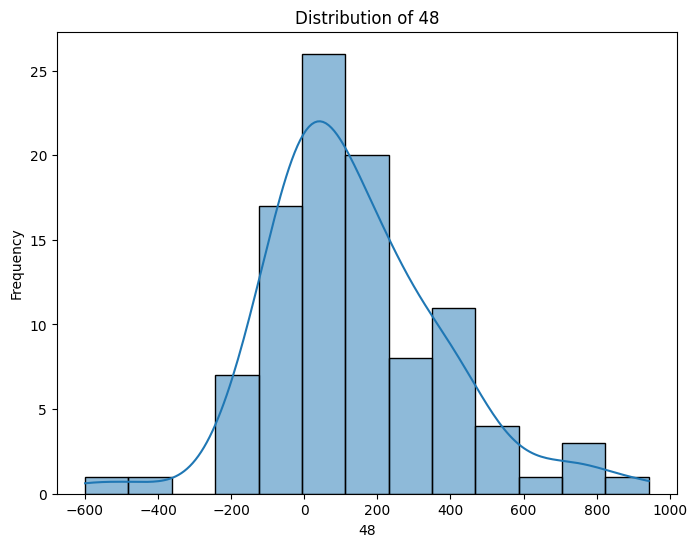

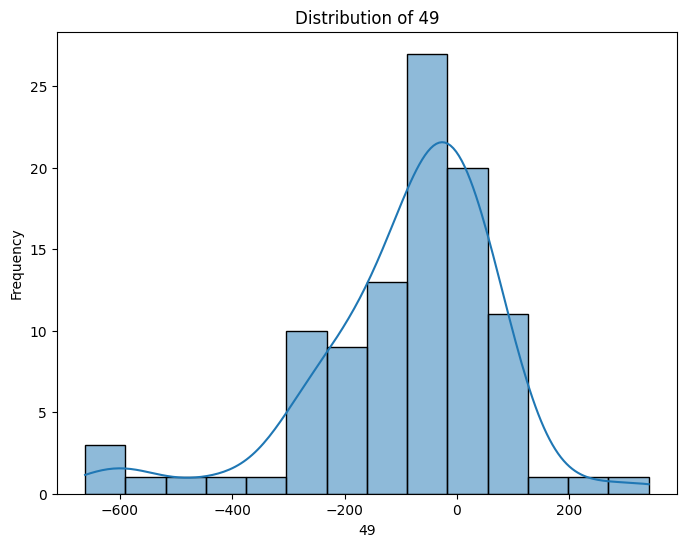

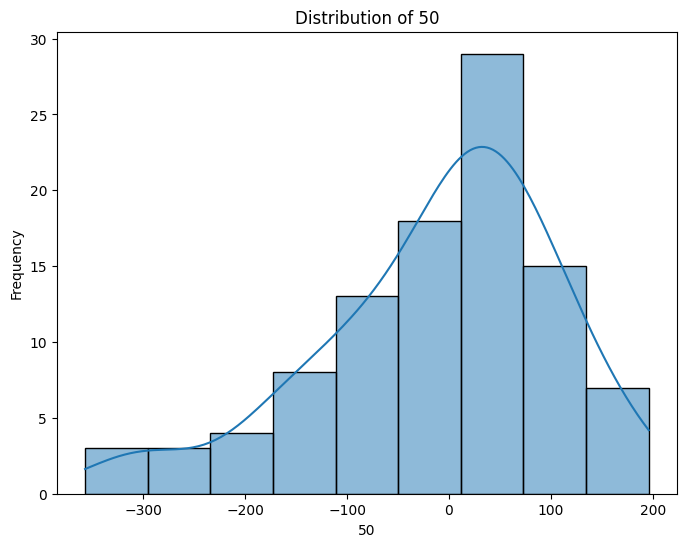

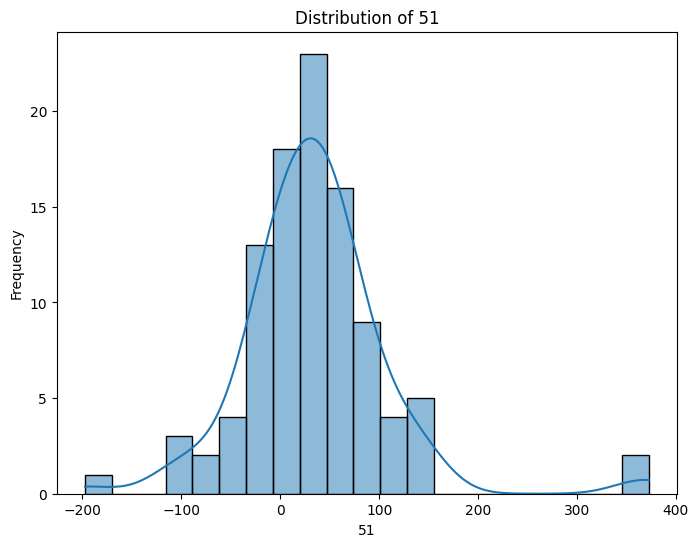

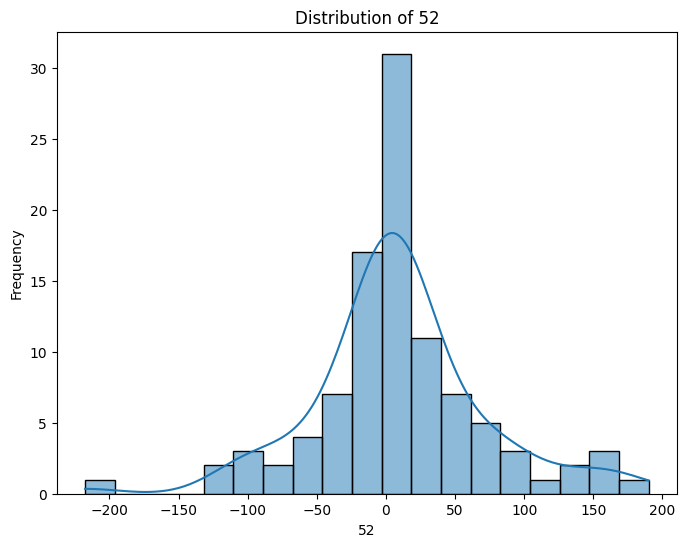

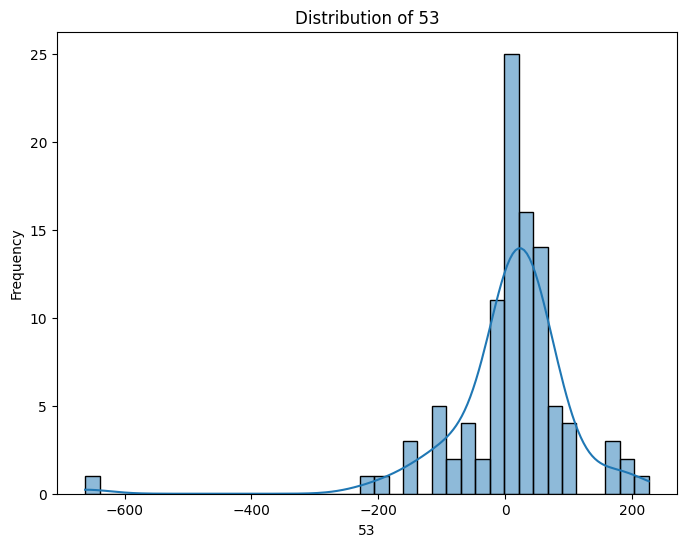

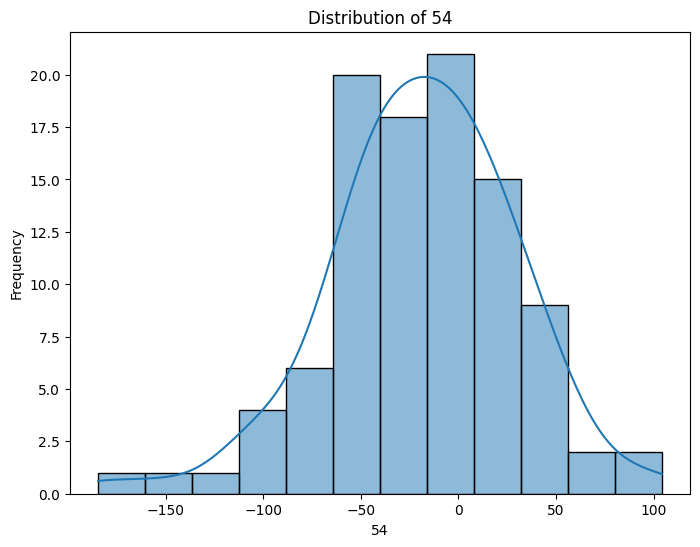

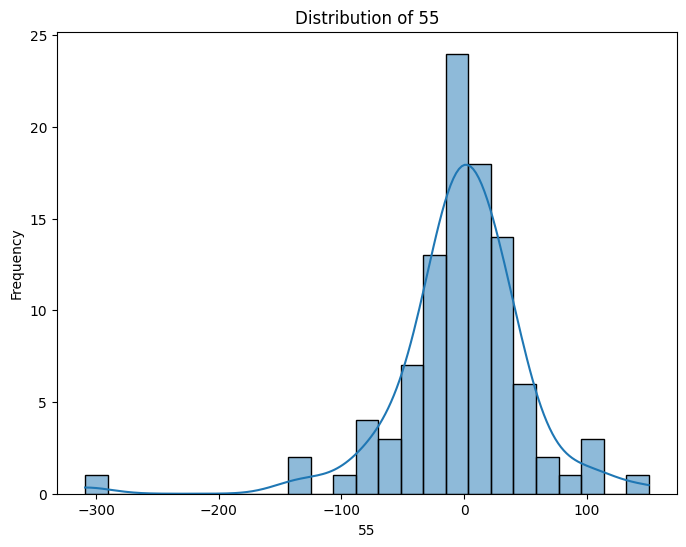

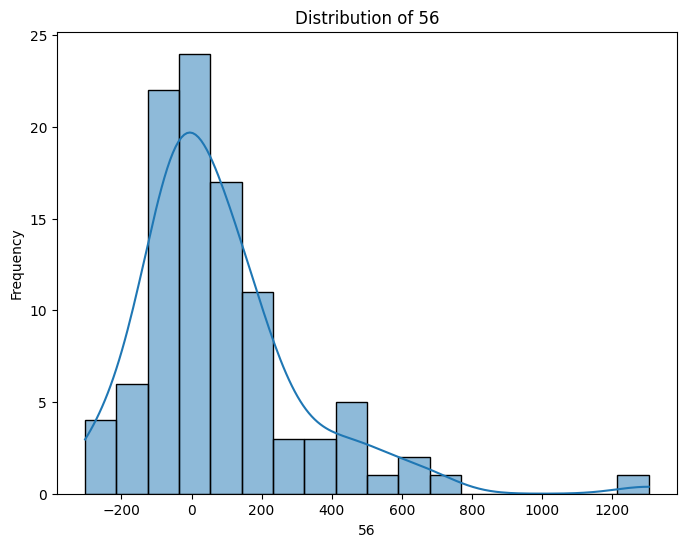

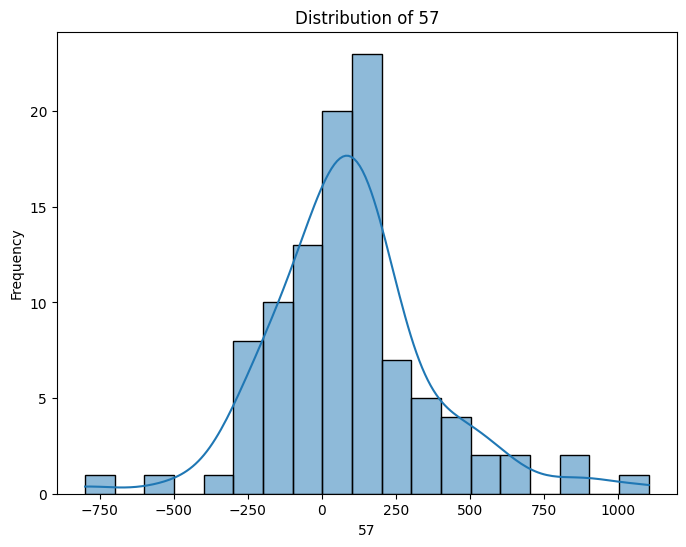

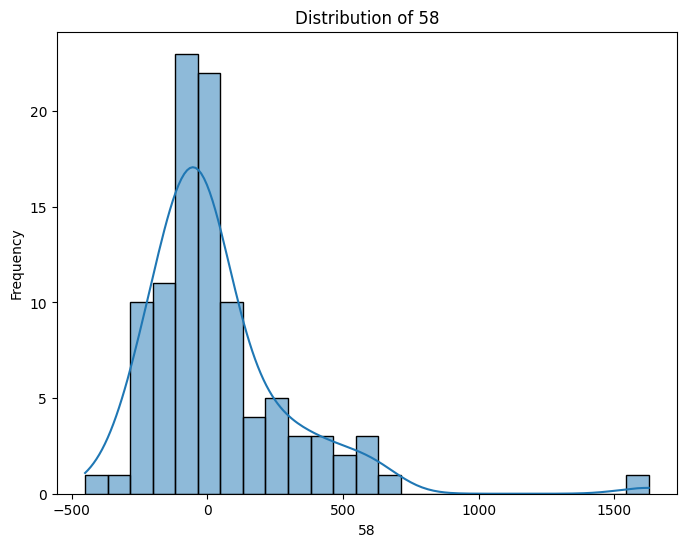

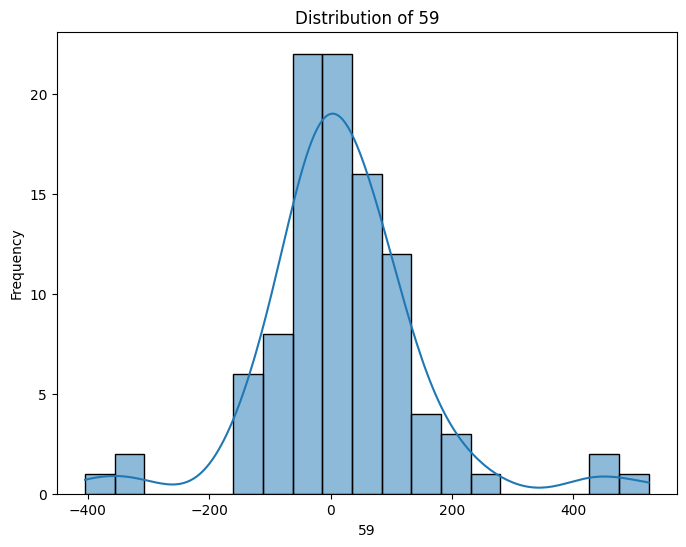

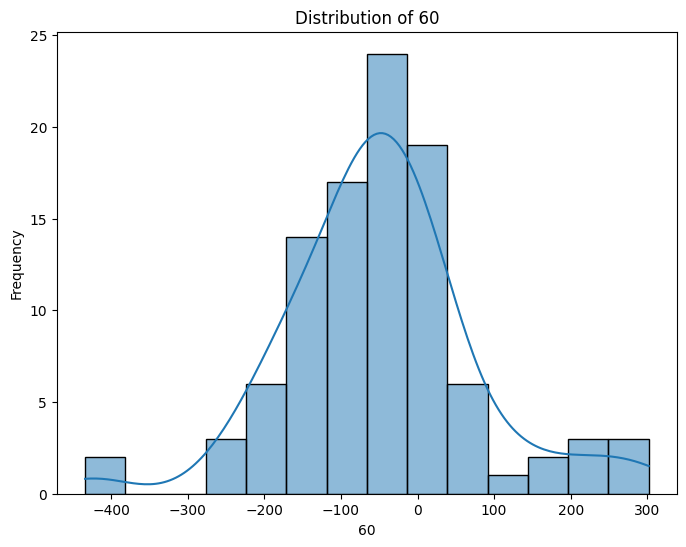

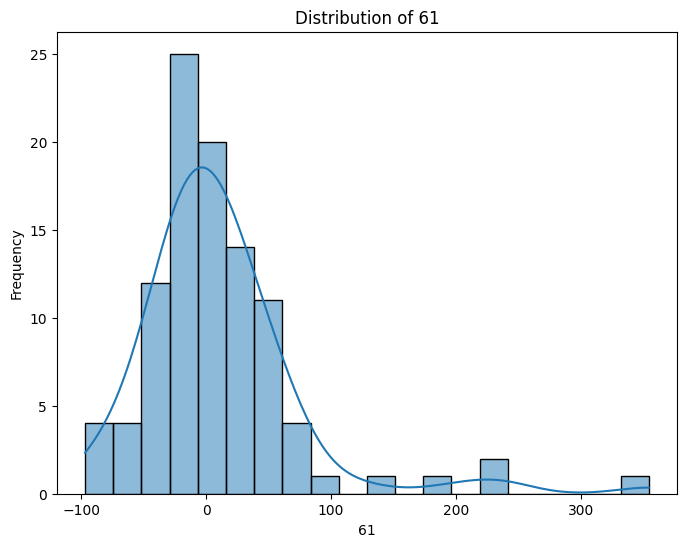

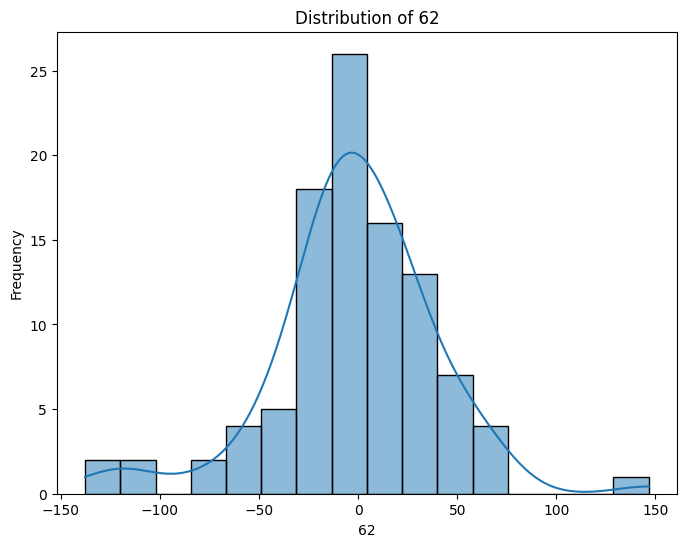

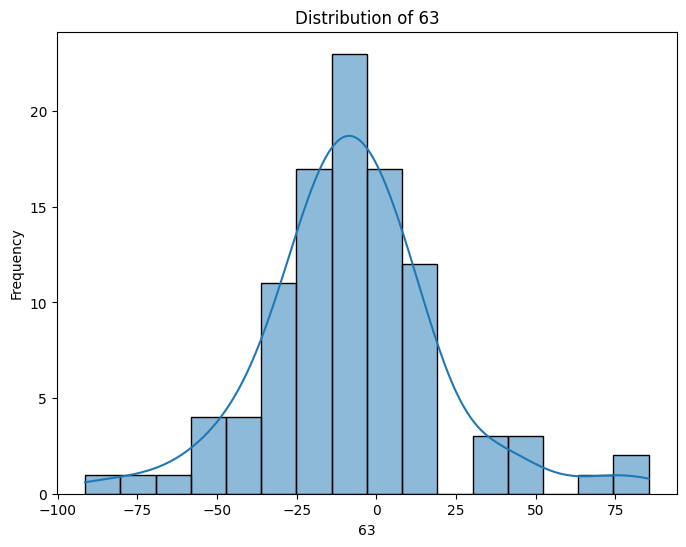

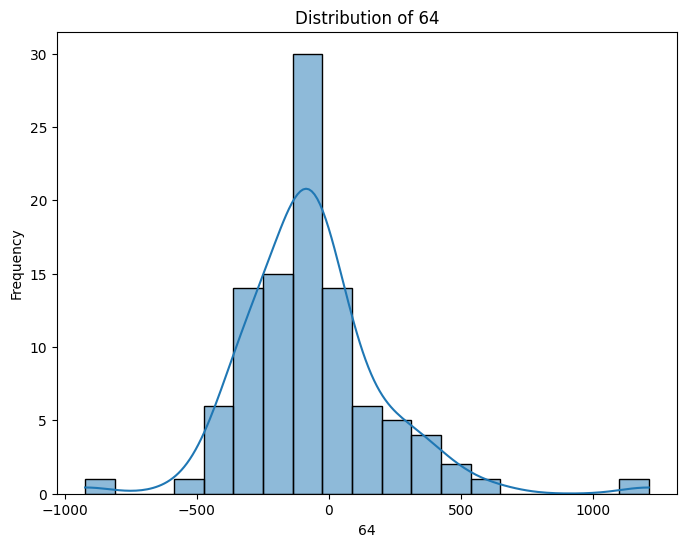

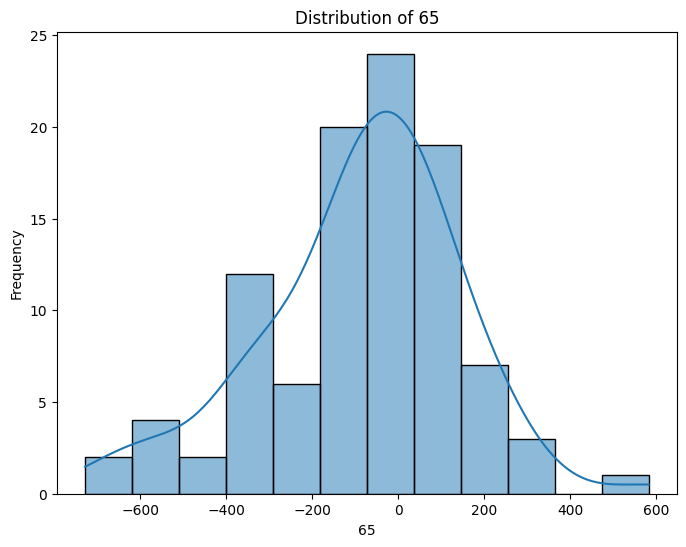

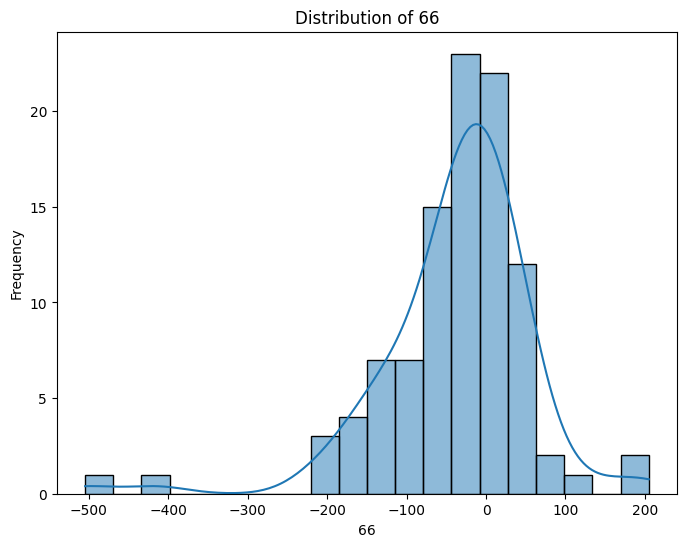

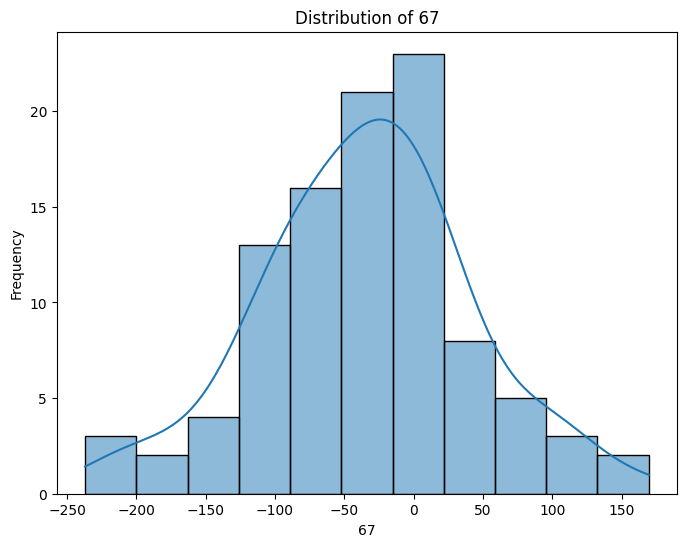

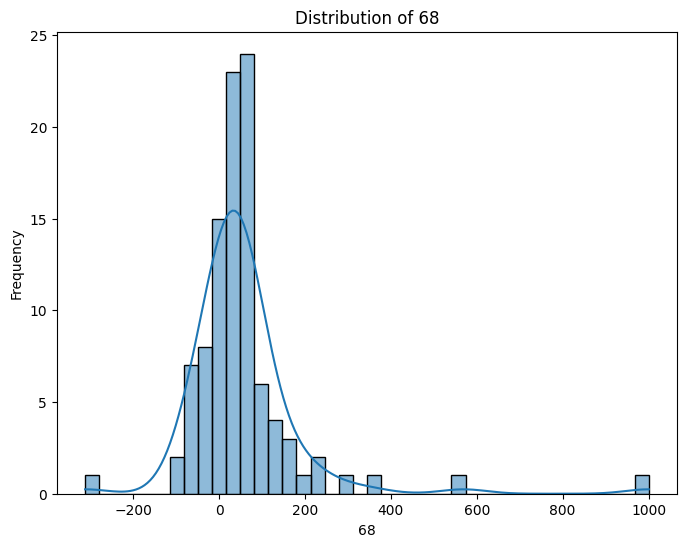

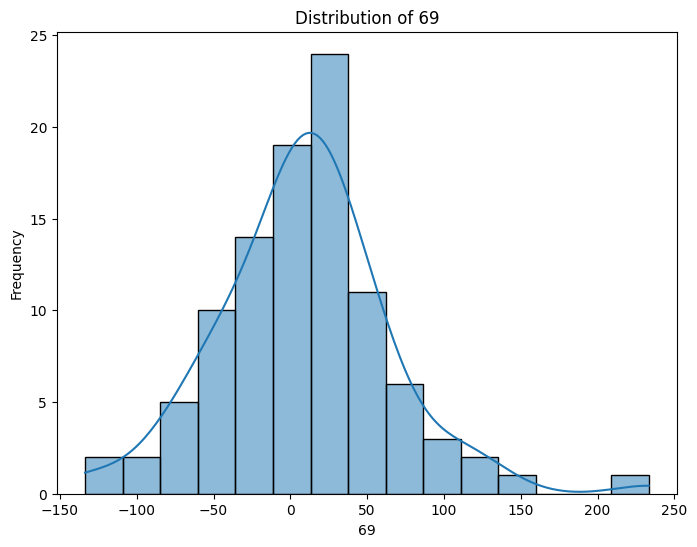

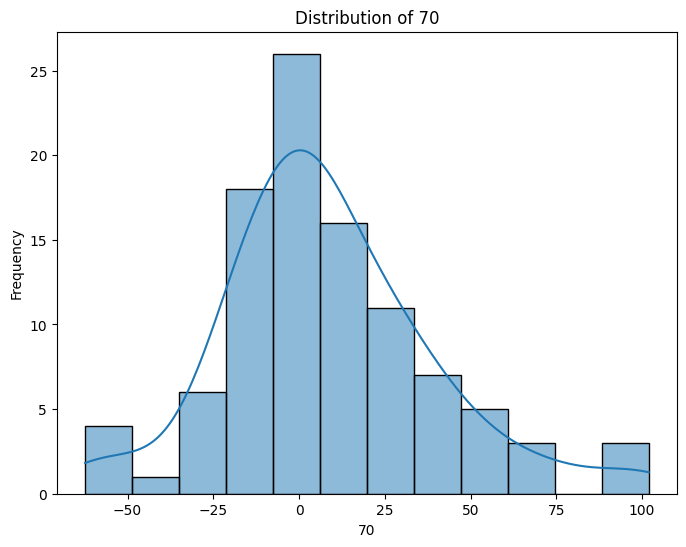

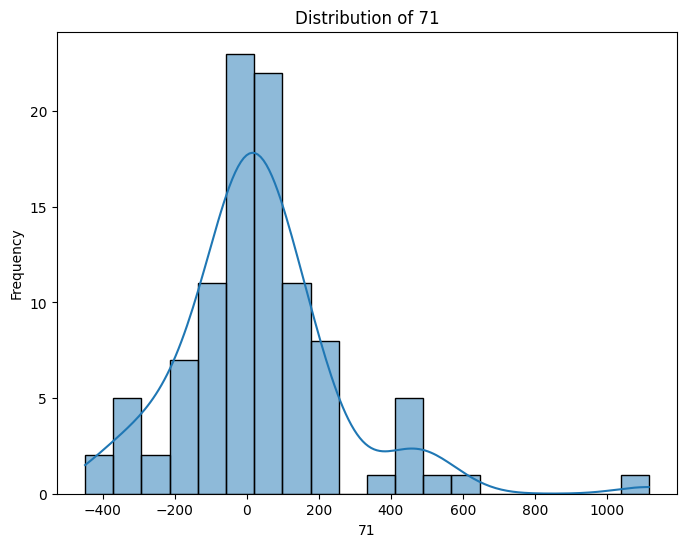

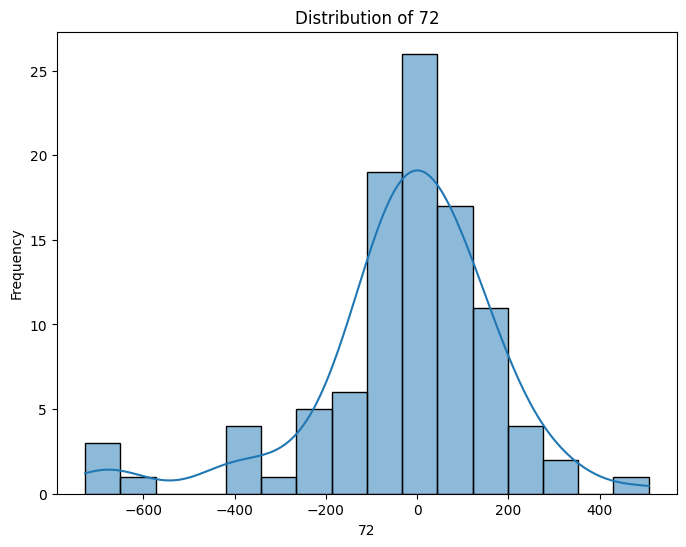

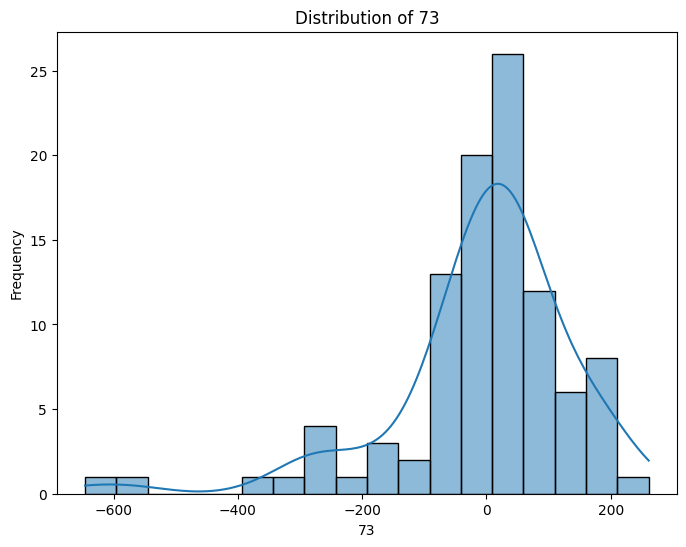

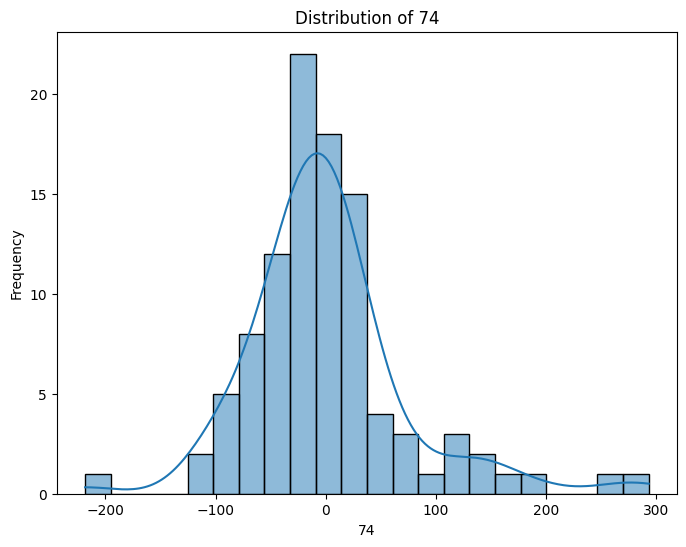

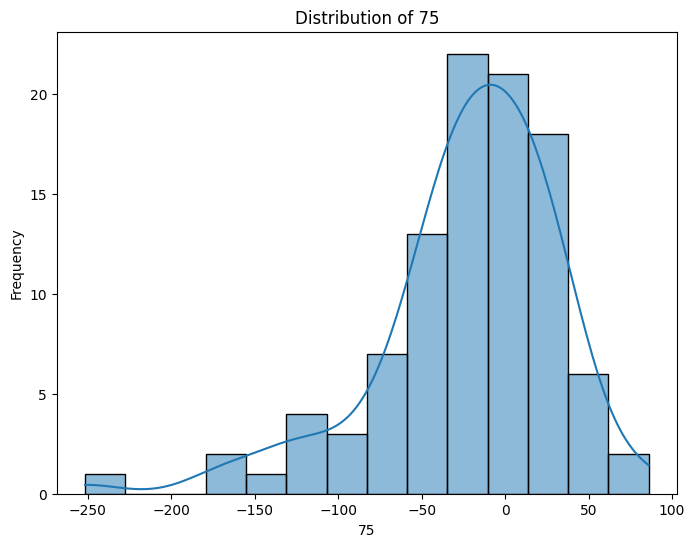

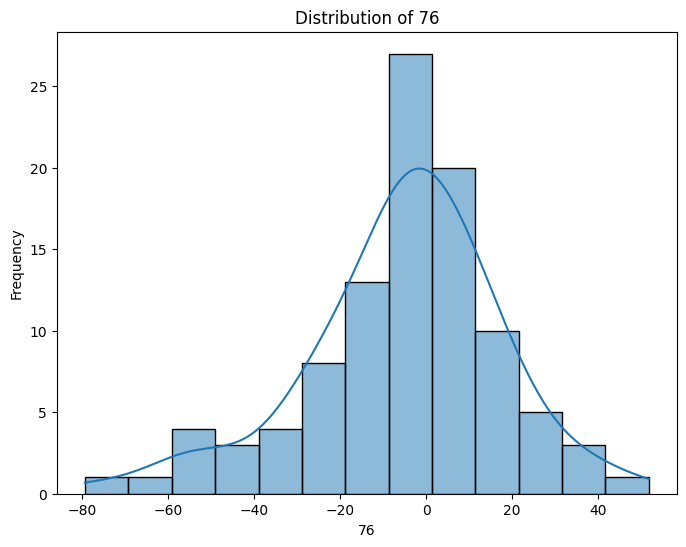

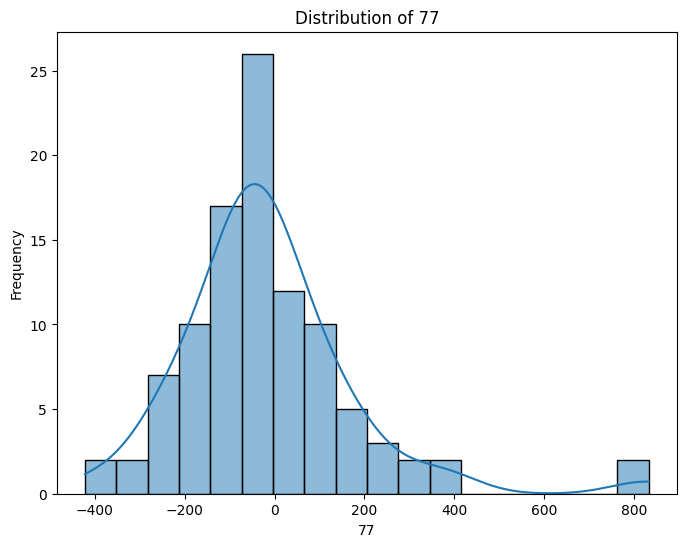

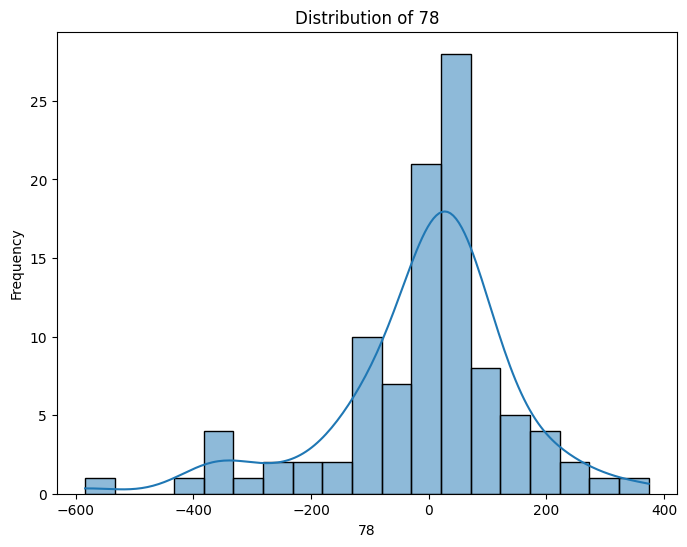

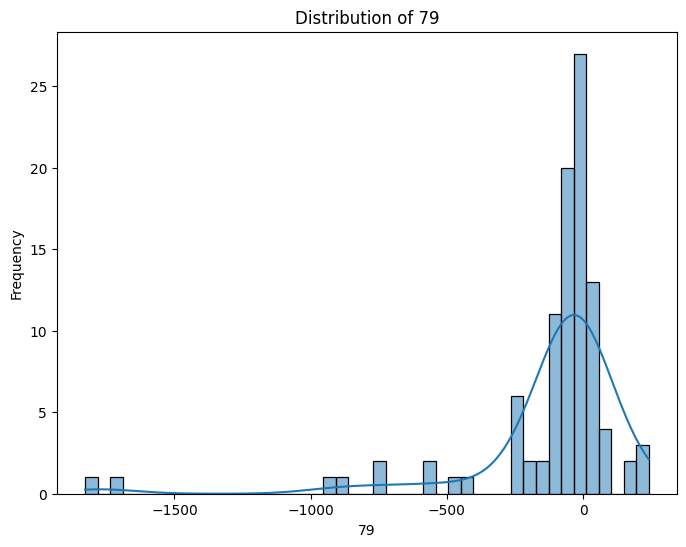

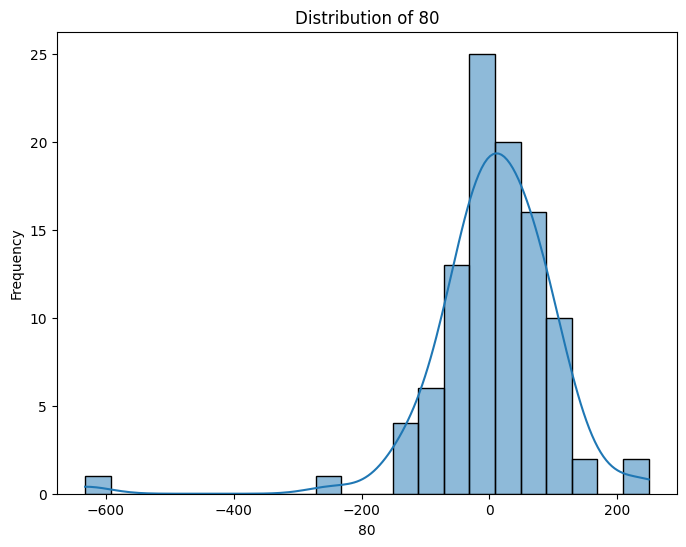

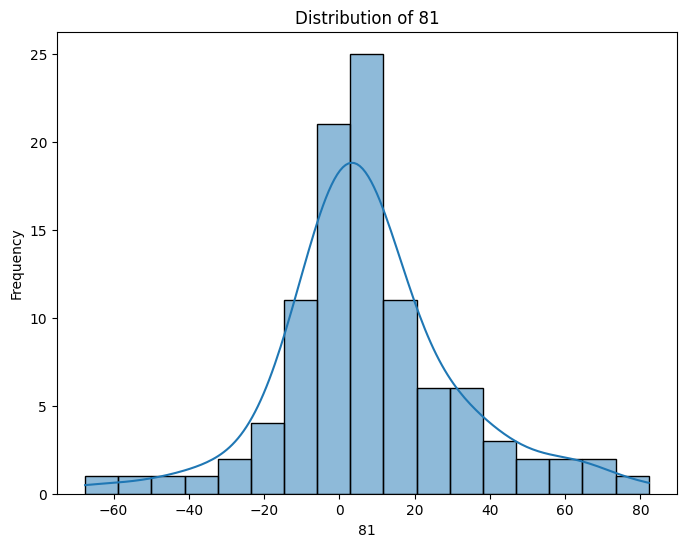

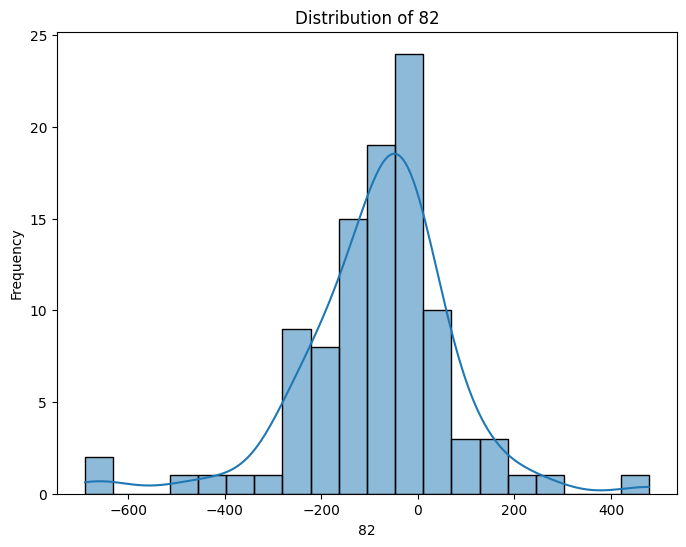

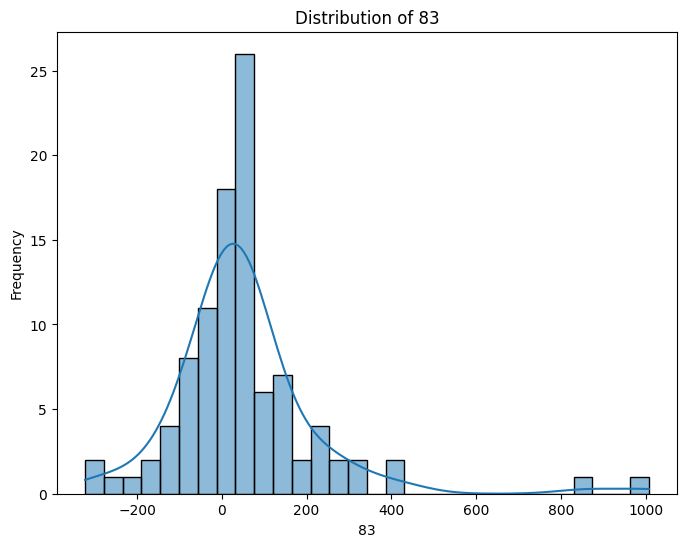

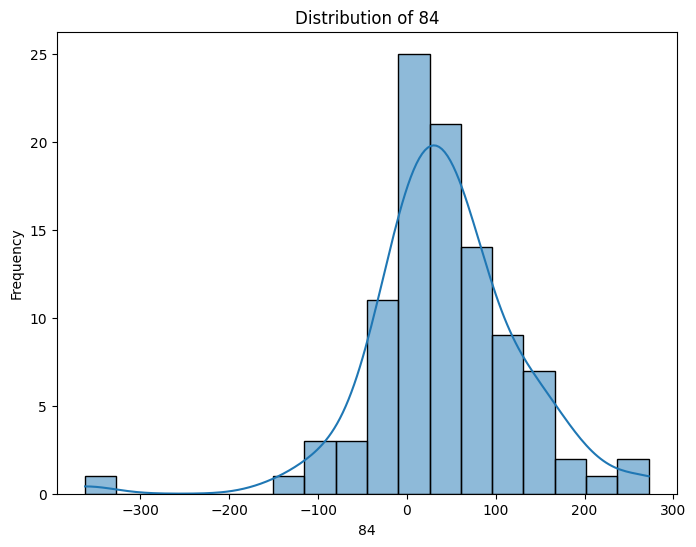

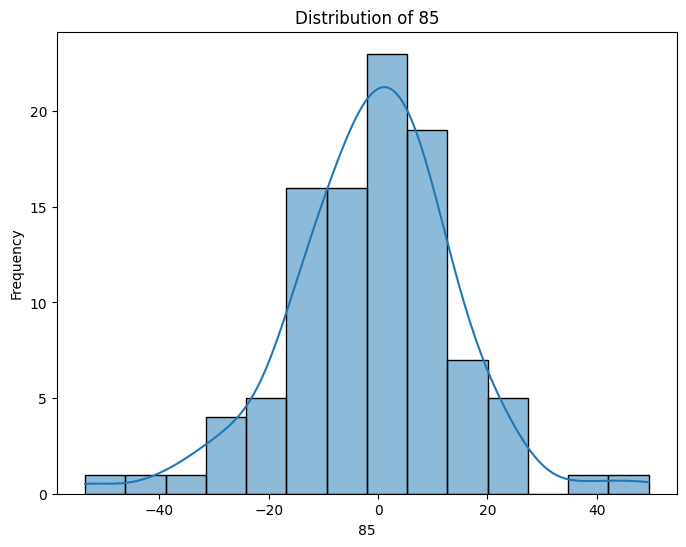

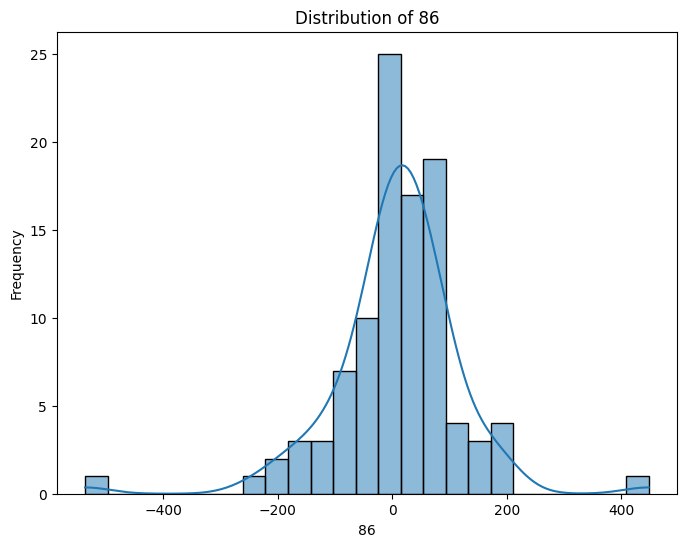

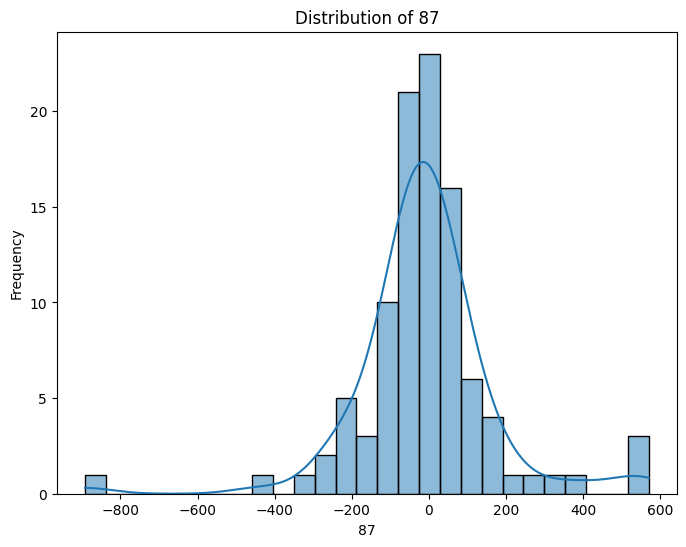

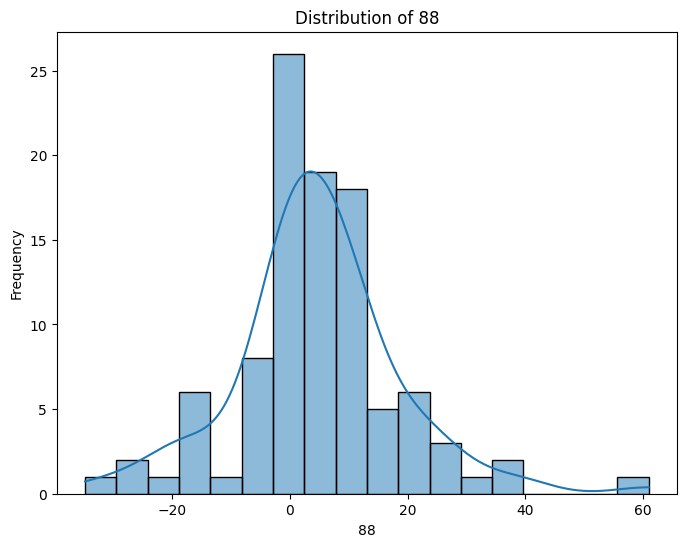

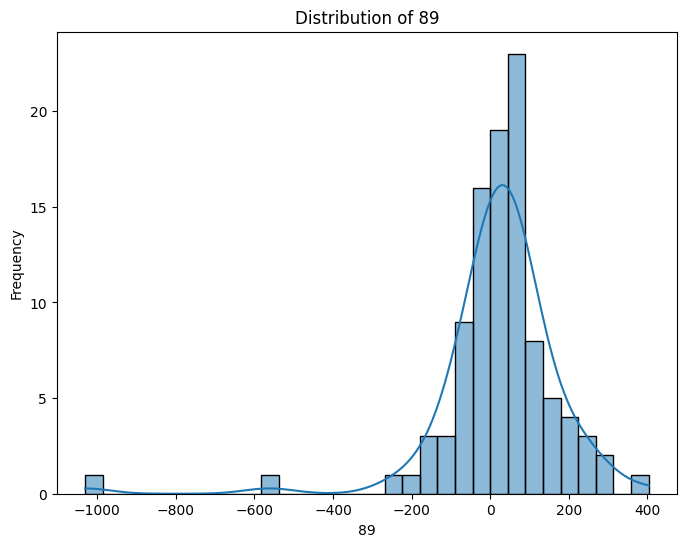

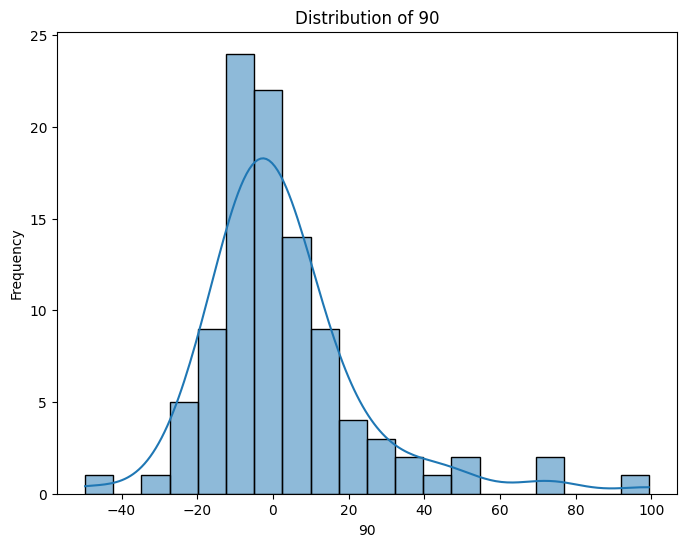

NameError: name 'y' is not defined

<Figure size 800x600 with 0 Axes>

In [5]:
for col in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='year', data=y)
plt.title('Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Dari hasil distribusi setiap feature, dapat disimpulkan bahwa memiliki distribusi yang beragam termasuk Distribusi Normal, Right-Skewed, dan Left-Skewed

# Cek Korelasi antar Variabel

In [ ]:
plt.figure(figsize=(120, 100))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

0         1         2         3         4         5         6   \
0   1.000000  0.237336  0.475899  0.061568  0.513836  0.531116 -0.285350   
1   0.237336  1.000000  0.630000  0.470601  0.122765  0.011457 -0.382514   
2   0.475899  0.630000  1.000000  0.227196  0.320283  0.091998 -0.347073   
3   0.061568  0.470601  0.227196  1.000000  0.321671 -0.062936 -0.270119   
4   0.513836  0.122765  0.320283  0.321671  1.000000  0.197891  0.084472   
..       ...       ...       ...       ...       ...       ...       ...   
86 -0.108462  0.162938  0.075114 -0.053270 -0.104978 -0.123281  0.185485   
87  0.201208 -0.011194  0.112170  0.131731  0.195818  0.183950  0.020738   
88 -0.181418 -0.230105 -0.278123 -0.195090  0.040437 -0.102992  0.270759   
89  0.063029  0.190961  0.116215  0.074014  0.154783 -0.020099  0.087703   
90 -0.111979 -0.403892 -0.383783 -0.002003 -0.042644  0.026842  0.100005   

          7         8         9   ...        81        82        83        84  \
0   0.385455  0.429076 -0.332844  ... -0.109441 -0.317038  0.220803  0.360203   
1   0.075315  0.002498 -0.035763  ... -0.243764 -0.125151 -0.112621  0.056520   
2   0.321774  0.349034 -0.275956  ... -0.137856 -0.250984  0.133506  0.161988   
3   0.079808  0.123745 -0.041742  ... -0.065764 -0.025997 -0.071771 -0.036993   
4   0.449107  0.282503 -0.299037  ...  0.152374 -0.384117  0.281159  0.323763   
..       ...       ...       ...  ...       ...       ...       ...       ...   
86  0.012376 -0.055476  0.193734  ...  0.089979  0.157043 -0.109680 -0.074594   
87  0.143503  0.403859 -0.058214  ...  0.168126 -0.301901  0.181268  0.407699   
88 -0.066082 -0.092105  0.289451  ... -0.079253  0.091877  0.290523 -0.094252   
89  0.052717  0.098633 -0.009574  ...  0.228313 -0.432696  0.128265  0.403715   
90 -0.141210 -0.036302  0.189349  ... -0.075103  0.025894  0.015164 -0.297795   

          85        86        87        88        89        90  
0  -0.103474 -0.108462  0.201208 -0.181418  0.063029 -0.111979  
1   0.209725  0.162938 -0.011194 -0.230105  0.190961 -0.403892  
2   0.209671  0.075114  0.112170 -0.278123  0.116215 -0.383783  
3   0.084017 -0.053270  0.131731 -0.195090  0.074014 -0.002003  
4  -0.113477 -0.104978  0.195818  0.040437  0.154783 -0.042644  
..       ...       ...       ...       ...       ...       ...  
86  0.024292  1.000000 -0.100857  0.247851  0.145237  0.008132  
87 -0.083040 -0.100857  1.000000 -0.228658  0.317619 -0.066572  
88 -0.253278  0.247851 -0.228658  1.000000 -0.051241  0.295883  
89  0.018335  0.145237  0.317619 -0.051241  1.000000 -0.215353  
90 -0.450106  0.008132 -0.066572  0.295883 -0.215353  1.000000  

[91 rows x 91 columns]

Hasil dari proses pembersihan outlier dari tiap variabel

In [16]:
df.head()

0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87        88         89        90  
0 -23.08793   68.40795  -1.82223  -27.46348   2.26327  
1 -32.22788   70.49388  12.04941   58.43453  26.92061  
2  43.20130 -115.00698  -0.05859   39.67068  -0.66345  
3  82.58061  -72.08993   9.90558  199.62971  18.85382  
4  -7.50035   51.76631   7.88713   55.66926  28.74903  

[5 rows x 91 columns]

Menyiapkan semua Feature

In [4]:
selected_features = df.columns[1:].tolist()
print(selected_features)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [6]:
X = df[selected_features]
y = df[0]

# Mengecek label y

In [8]:
print(f"Unique values in 'y': {np.unique(y)}")

Unique values in 'y': [1987 1992 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2007 2008
 2009]


# Bagi data training dan test lalu menyiapkan model

In [9]:

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

models = {
    'Polynomial Regression': Pipeline([
        ('scaler', scaler),  # Add scaling step
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ]),
    'Decision Tree': Pipeline([
        ('scaler', scaler),  # Add scaling step
        ('decision_tree', DecisionTreeRegressor())
    ]),
    'k-NN': Pipeline([
        ('scaler', scaler),  # Add scaling step
        ('k_neighbors', KNeighborsRegressor())
    ]),
    'XGBoost': Pipeline([
        ('scaler', scaler),  # Add scaling step
        ('xgboost', XGBRegressor())
    ])
}

results = {}

# Menerapkan setiap model ke data dengan menggunakan Iterasi

In [10]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"  R-squared: {metrics['R2']:.4f}")
    print()


Model: Polynomial Regression
  Mean Squared Error: 18.0194
  R-squared: 0.2106

Model: Decision Tree
  Mean Squared Error: 25.6500
  R-squared: -0.1236

Model: k-NN
  Mean Squared Error: 15.9320
  R-squared: 0.3021

Model: XGBoost
  Mean Squared Error: 18.2578
  R-squared: 0.2002



Berdasarkan hasil evaluasi model-model regresi yang telah Anda jalankan, berikut adalah beberapa **insight** yang dapat diambil:

### 1. **Polynomial Regression**:
   - **MSE**: 18.0194
   - **R²**: 0.2106
   - **Insight**: Polynomial Regression memiliki performa yang kurang baik, dengan MSE yang relatif tinggi dan R² yang rendah. Artinya, model ini hanya menjelaskan sekitar 21% dari variabilitas data, yang menunjukkan bahwa regresi polinomial mungkin tidak cukup untuk menangkap pola yang kompleks atau hubungan non-linear dalam data Anda.

### 2. **Decision Tree**:
   - **MSE**: 18.1500
   - **R²**: 0.2049
   - **Insight**: Decision Tree juga memberikan hasil yang serupa dengan Polynomial Regression. MSE sedikit lebih tinggi dan R² lebih rendah. Hal ini menunjukkan bahwa Decision Tree mungkin terlalu sederhana atau terlalu kompleks untuk dataset ini, dan kemungkinan besar model ini mengalami overfitting atau underfitting.

### 3. **k-NN**:
   - **MSE**: 15.9320
   - **R²**: 0.3021
   - **Insight**: Model k-NN sedikit lebih baik daripada Polynomial Regression dan Decision Tree dalam hal MSE dan R². R² sebesar 0.3021 menunjukkan bahwa k-NN dapat menjelaskan sekitar 30% dari variabilitas data. Meskipun performa masih belum optimal, model k-NN mungkin lebih baik dalam menangkap hubungan antara fitur dan target dibandingkan dengan yang lain.

### 4. **XGBoost**:
   - **MSE**: 18.2578
   - **R²**: 0.2002
   - **Insight**: XGBoost memberikan hasil yang sangat mirip dengan Decision Tree dan Polynomial Regression. Meskipun XGBoost sering kali dianggap sebagai model yang kuat untuk regresi, dalam hal ini, performanya tampaknya tidak jauh lebih baik. Hal ini bisa disebabkan oleh hyperparameter yang belum dioptimalkan atau data yang tidak cukup representatif untuk model ini.

### **General Insights**:
- Semua model memberikan **R²** yang relatif rendah (sekitar 20-30%), yang berarti bahwa model-model ini belum dapat menjelaskan sebagian besar variabilitas dalam data. Mungkin ada faktor-faktor yang belum ditangkap oleh fitur yang digunakan.
- **MSE** yang serupa antara model-model ini menunjukkan bahwa semua model masih memiliki tingkat kesalahan yang cukup tinggi, yang menunjukkan bahwa model belum cukup kuat untuk memprediksi dengan akurat.

Secara keseluruhan, meskipun ada perbedaan kecil di antara model-model ini, semua model masih menunjukkan performa yang kurang optimal, yang menunjukkan bahwa ada ruang untuk perbaikan lebih lanjut baik dalam pemilihan model maupun pada pengolahan data.

# Menerapkan Hyperparameter Tuning pada setiap model

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Polynomial Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('poly_features', PolynomialFeatures(degree=2)),
        ('ridge_regression', Ridge())
    ]),
    'Decision Tree': DecisionTreeRegressor(),
    'k-NN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

param_grids = {
    'Polynomial Regression': {
        'poly_features__degree': [1, 2, 3, 4, 5],
        'ridge_regression__alpha': [0.1, 1.0, 10.0]
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'k-NN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_child_weight': [1, 2, 3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

results = {}

for name, model in models.items():
    if name == 'Polynomial Regression':
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    else:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'Best Parameters': grid_search.best_params_,
                     'Best MSE': -grid_search.best_score_,
                     'R2 Score': r2}


# Report dari tiap hasil akhir model

In [ ]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Best Parameters: {metrics['Best Parameters']}")
    print(f"  Best Mean Squared Error: {metrics['Best MSE']:.4f}")
    print(f"  R-squared: {metrics['R2 Score']:.4f}")
    print()
